# CMS Rating Case Study

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
df = pd.read_csv("Readmissions and Deaths - Hospital.csv")

In [3]:
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9,NaN,07/01/2012,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,278,4.2,2.6,6.8,NaN,07/01/2012,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for chronic obstructive pulmonary d...,MORT_30_COPD,No Different than the National Rate,586,9.3,7.3,11.8,NaN,07/01/2012,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,797,12.4,10.4,14.6,NaN,07/01/2012,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Pneumonia (PN) 30-Day Mortality Rate,MORT_30_PN,No Different than the National Rate,599,15.5,13.0,18.5,NaN,07/01/2012,06/30/2015


In [4]:
# drop unnecessary columns
df = df.drop(['Measure Name','Lower Estimate','Higher Estimate','Footnote','Measure Start Date','Measure End Date'],axis=1)

In [5]:
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Compared to National,Denominator,Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,MORT_30_AMI,No Different than the National Rate,733,12.5
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,MORT_30_CABG,No Different than the National Rate,278,4.2
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,MORT_30_COPD,No Different than the National Rate,586,9.3
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,MORT_30_HF,No Different than the National Rate,797,12.4
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,MORT_30_PN,No Different than the National Rate,599,15.5


## Creating Group Measures Data

In [6]:
print(df.Score.value_counts())
print(df.Denominator.value_counts())
print(df['Compared to National'].value_counts())

Not Available    25742
15.5               612
15.4               586
15.7               567
15.3               556
15.6               550
15.2               530
15.1               511
16.2               493
15.8               492
15.9               485
15.0               483
16.0               476
16.4               469
14.9               460
16.1               457
16.6               457
16.5               449
16.3               432
16.7               429
16.8               426
14.7               398
17.0               397
14.5               394
14.4               380
17.1               379
14.6               379
16.9               376
14.8               362
17.3               347
14.2               345
13.2               341
14.3               339
17.2               333
13.9               331
13.8               310
14.0               309
12.4               308
13.7               307
13.4               304
13.5               303
12.8               303
13.3               297
14.1       

In [7]:
# reaplcing Not Available with null
df.replace('Not Available', np.nan, inplace = True)

In [8]:
df.shape

(67452, 12)

In [9]:
# create a new df with measureID and score
score = df.filter(['Provider ID','Measure ID','Score'],axis=1)

In [10]:
score.head()

,Provider ID,Measure ID,Score
0,10001,MORT_30_AMI,12.5
1,10001,MORT_30_CABG,4.2
2,10001,MORT_30_COPD,9.3
3,10001,MORT_30_HF,12.4
4,10001,MORT_30_PN,15.5


In [11]:
# create a new df with measureID and denominator
denominator = df.filter(['Provider ID','Measure ID','Denominator'],axis=1)

In [12]:
denominator.head()

,Provider ID,Measure ID,Denominator
0,10001,MORT_30_AMI,733
1,10001,MORT_30_CABG,278
2,10001,MORT_30_COPD,586
3,10001,MORT_30_HF,797
4,10001,MORT_30_PN,599


In [13]:
nationalCompare = df.filter(['Provider ID','Measure ID','Compared to National'],axis=1)

In [14]:
nationalCompare.head()

,Provider ID,Measure ID,Compared to National
0,10001,MORT_30_AMI,No Different than the National Rate
1,10001,MORT_30_CABG,No Different than the National Rate
2,10001,MORT_30_COPD,No Different than the National Rate
3,10001,MORT_30_HF,No Different than the National Rate
4,10001,MORT_30_PN,No Different than the National Rate


In [15]:
# create a dataframe with all the hospital information
final_df = df[['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number']]

In [16]:
#remove duplicates from the data
final_df.drop_duplicates(subset =None, keep = 'first', inplace = True) 
final_df.shape

(4818, 8)

In [17]:
# create a pivot for all the measures
score_pivot = score.pivot('Provider ID','Measure ID','Score')
score_pivot.head()

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Provider ID,,,,,,,,,,,,,,
10001,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
10005,16.0,NaN,7.6,15.5,20.8,15.5,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4
10006,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0
10007,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7
10008,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN


In [18]:
score_pivot.shape

(4818, 14)

In [19]:
# flatten the pivot table
score = pd.DataFrame(score_pivot.to_records())
score.head()

,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
0,10001,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
1,10005,16.0,NaN,7.6,15.5,20.8,15.5,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4
2,10006,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0
3,10007,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7
4,10008,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN


In [20]:
# rename columns
score.columns = [hdr.replace("MORT", "SCORE_MORT").replace("READM", "SCORE_READM") for hdr in score.columns]
score.head()

,Provider ID,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK
0,10001,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
1,10005,16.0,NaN,7.6,15.5,20.8,15.5,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4
2,10006,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0
3,10007,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7
4,10008,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN


In [21]:
# create pivot table for denominator
denominator_pivot = denominator.pivot('Provider ID','Measure ID','Denominator')
denominator_pivot.head()

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Provider ID,,,,,,,,,,,,,,
10001,733,278,586,797,599,512,781,273,707,981,335,5590,664,520
10005,59,NaN,572,377,897,261,40,NaN,667,389,249,2607,890,248
10006,360,139,613,702,862,308,356,134,713,805,378,4124,892,276
10007,NaN,NaN,109,96,205,33,NaN,NaN,130,107,NaN,548,200,30
10008,NaN,NaN,36,26,66,NaN,NaN,NaN,41,25,NaN,168,73,NaN


In [22]:
# flatten pivot table
denominator = pd.DataFrame(denominator_pivot.to_records())
denominator.head()

,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
0,10001,733,278,586,797,599,512,781,273,707,981,335,5590,664,520
1,10005,59,NaN,572,377,897,261,40,NaN,667,389,249,2607,890,248
2,10006,360,139,613,702,862,308,356,134,713,805,378,4124,892,276
3,10007,NaN,NaN,109,96,205,33,NaN,NaN,130,107,NaN,548,200,30
4,10008,NaN,NaN,36,26,66,NaN,NaN,NaN,41,25,NaN,168,73,NaN


In [23]:
# rename columns
denominator.columns = [hdr.replace("MORT", "DENOMINATOR_MORT").replace("READM", "DENOMINATOR_READM") for hdr in denominator.columns]
denominator.head()

,Provider ID,DENOMINATOR_MORT_30_AMI,DENOMINATOR_MORT_30_CABG,DENOMINATOR_MORT_30_COPD,DENOMINATOR_MORT_30_HF,DENOMINATOR_MORT_30_PN,DENOMINATOR_MORT_30_STK,DENOMINATOR_READM_30_AMI,DENOMINATOR_READM_30_CABG,DENOMINATOR_READM_30_COPD,DENOMINATOR_READM_30_HF,DENOMINATOR_READM_30_HIP_KNEE,DENOMINATOR_READM_30_HOSP_WIDE,DENOMINATOR_READM_30_PN,DENOMINATOR_READM_30_STK
0,10001,733,278,586,797,599,512,781,273,707,981,335,5590,664,520
1,10005,59,NaN,572,377,897,261,40,NaN,667,389,249,2607,890,248
2,10006,360,139,613,702,862,308,356,134,713,805,378,4124,892,276
3,10007,NaN,NaN,109,96,205,33,NaN,NaN,130,107,NaN,548,200,30
4,10008,NaN,NaN,36,26,66,NaN,NaN,NaN,41,25,NaN,168,73,NaN


In [24]:
# merge both the pivot tables
temp = pd.merge(score, denominator, on='Provider ID')

In [25]:
# merge measues witht the hospital master data
final_df = pd.merge(final_df, temp, on='Provider ID')
final_df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK,DENOMINATOR_MORT_30_AMI,DENOMINATOR_MORT_30_CABG,DENOMINATOR_MORT_30_COPD,DENOMINATOR_MORT_30_HF,DENOMINATOR_MORT_30_PN,DENOMINATOR_MORT_30_STK,DENOMINATOR_READM_30_AMI,DENOMINATOR_READM_30_CABG,DENOMINATOR_READM_30_COPD,DENOMINATOR_READM_30_HF,DENOMINATOR_READM_30_HIP_KNEE,DENOMINATOR_READM_30_HOSP_WIDE,DENOMINATOR_READM_30_PN,DENOMINATOR_READM_30_STK
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,733,278,586,797,599,512,781,273,707,981,335,5590,664,520
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,16.0,NaN,7.6,15.5,20.8,15.5,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,59,NaN,572,377,897,261,40,NaN,667,389,249,2607,890,248
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,360,139,613,702,862,308,356,134,713,805,378,4124,892,276
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7,NaN,NaN,109,96,205,33,NaN,NaN,130,107,NaN,548,200,30
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN,NaN,NaN,36,26,66,NaN,NaN,NaN,41,25,NaN,168,73,NaN


In [26]:
final_df.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'SCORE_MORT_30_AMI',
       'SCORE_MORT_30_CABG', 'SCORE_MORT_30_COPD', 'SCORE_MORT_30_HF',
       'SCORE_MORT_30_PN', 'SCORE_MORT_30_STK', 'SCORE_READM_30_AMI',
       'SCORE_READM_30_CABG', 'SCORE_READM_30_COPD', 'SCORE_READM_30_HF',
       'SCORE_READM_30_HIP_KNEE', 'SCORE_READM_30_HOSP_WIDE',
       'SCORE_READM_30_PN', 'SCORE_READM_30_STK', 'DENOMINATOR_MORT_30_AMI',
       'DENOMINATOR_MORT_30_CABG', 'DENOMINATOR_MORT_30_COPD',
       'DENOMINATOR_MORT_30_HF', 'DENOMINATOR_MORT_30_PN',
       'DENOMINATOR_MORT_30_STK', 'DENOMINATOR_READM_30_AMI',
       'DENOMINATOR_READM_30_CABG', 'DENOMINATOR_READM_30_COPD',
       'DENOMINATOR_READM_30_HF', 'DENOMINATOR_READM_30_HIP_KNEE',
       'DENOMINATOR_READM_30_HOSP_WIDE', 'DENOMINATOR_READM_30_PN',
       'DENOMINATOR_READM_30_STK'],
      dtype='object')

### Readmission Group

In [27]:
# Get measures which are related to the group Readmission
readmission = final_df[['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number','SCORE_READM_30_AMI',
       'SCORE_READM_30_CABG', 'SCORE_READM_30_COPD', 'SCORE_READM_30_HF',
       'SCORE_READM_30_HIP_KNEE', 'SCORE_READM_30_HOSP_WIDE',
       'SCORE_READM_30_PN', 'SCORE_READM_30_STK','DENOMINATOR_READM_30_AMI',
       'DENOMINATOR_READM_30_CABG', 'DENOMINATOR_READM_30_COPD',
       'DENOMINATOR_READM_30_HF', 'DENOMINATOR_READM_30_HIP_KNEE',
       'DENOMINATOR_READM_30_HOSP_WIDE', 'DENOMINATOR_READM_30_PN',
       'DENOMINATOR_READM_30_STK']]
readmission.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK,DENOMINATOR_READM_30_AMI,DENOMINATOR_READM_30_CABG,DENOMINATOR_READM_30_COPD,DENOMINATOR_READM_30_HF,DENOMINATOR_READM_30_HIP_KNEE,DENOMINATOR_READM_30_HOSP_WIDE,DENOMINATOR_READM_30_PN,DENOMINATOR_READM_30_STK
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,781,273,707,981,335,5590,664,520
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,40,NaN,667,389,249,2607,890,248
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,356,134,713,805,378,4124,892,276
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7,NaN,NaN,130,107,NaN,548,200,30
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN,NaN,NaN,41,25,NaN,168,73,NaN


In [28]:
# score of measures for readmission
readmission_score = readmission[['Provider ID','SCORE_READM_30_AMI',
       'SCORE_READM_30_CABG', 'SCORE_READM_30_COPD', 'SCORE_READM_30_HF',
       'SCORE_READM_30_HIP_KNEE', 'SCORE_READM_30_HOSP_WIDE',
       'SCORE_READM_30_PN', 'SCORE_READM_30_STK']]
readmission_score.head()

,Provider ID,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK
0,10001,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
1,10005,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4
2,10006,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0
3,10007,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7
4,10008,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN


### Mortality Group

In [29]:
complications = pd.read_csv("Complications - Hospital.csv")

In [30]:
complications.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Measure Name', 'Measure ID',
       'Compared to National', 'Denominator', 'Score', 'Lower Estimate',
       'Higher Estimate', 'Footnote', 'Measure Start Date',
       'Measure End Date'],
      dtype='object')

In [31]:
# subset data
complications_mort = complications[['Provider ID','Measure ID','Denominator', 'Score']]

In [32]:
complications_mort.head()

,Provider ID,Measure ID,Denominator,Score
0,10001,COMP_HIP_KNEE,331,3.8
1,10001,PSI_12_POSTOP_PULMEMB_DVT,4549,3.32
2,10001,PSI_13_POST_SEPSIS,578,5.72
3,10001,PSI_14_POSTOP_DEHIS,445,2.72
4,10001,PSI_15_ACC_LAC,16429,1.35


In [33]:
# replace Not Available with nan
complications_mort.replace('Not Available', np.nan, inplace = True)

In [34]:
# subset data to get measures for mortality
temp = complications_mort.loc[complications_mort['Measure ID'] == 'PSI_4_SURG_COMP']

In [35]:
temp.shape
temp.head()

(4818, 4)

,Provider ID,Measure ID,Denominator,Score
6,10001,PSI_4_SURG_COMP,122,168.26
17,10005,PSI_4_SURG_COMP,51,179.05
28,10006,PSI_4_SURG_COMP,117,198.33
39,10007,PSI_4_SURG_COMP,NaN,NaN
50,10008,PSI_4_SURG_COMP,NaN,NaN


In [36]:
# rename columns
temp.columns = [hdr.replace("Denominator", "DENOMINATOR_PSI_4_SURG_COMP").replace("Score", "SCORE_PSI_4_SURG_COMP") for hdr in temp.columns]
temp.drop('Measure ID',axis=1,inplace=True)
temp.head()

,Provider ID,DENOMINATOR_PSI_4_SURG_COMP,SCORE_PSI_4_SURG_COMP
6,10001,122,168.26
17,10005,51,179.05
28,10006,117,198.33
39,10007,NaN,NaN
50,10008,NaN,NaN


In [37]:
# merge scores with final df
final_df = final_df = pd.merge(final_df, temp, on='Provider ID')
final_df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK,DENOMINATOR_MORT_30_AMI,DENOMINATOR_MORT_30_CABG,DENOMINATOR_MORT_30_COPD,DENOMINATOR_MORT_30_HF,DENOMINATOR_MORT_30_PN,DENOMINATOR_MORT_30_STK,DENOMINATOR_READM_30_AMI,DENOMINATOR_READM_30_CABG,DENOMINATOR_READM_30_COPD,DENOMINATOR_READM_30_HF,DENOMINATOR_READM_30_HIP_KNEE,DENOMINATOR_READM_30_HOSP_WIDE,DENOMINATOR_READM_30_PN,DENOMINATOR_READM_30_STK,DENOMINATOR_PSI_4_SURG_COMP,SCORE_PSI_4_SURG_COMP
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,733,278,586,797,599,512,781,273,707,981,335,5590,664,520,122,168.26
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,16.0,NaN,7.6,15.5,20.8,15.5,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,59,NaN,572,377,897,261,40,NaN,667,389,249,2607,890,248,51,179.05
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,360,139,613,702,862,308,356,134,713,805,378,4124,892,276,117,198.33
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7,NaN,NaN,109,96,205,33,NaN,NaN,130,107,NaN,548,200,30,NaN,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN,NaN,NaN,36,26,66,NaN,NaN,NaN,41,25,NaN,168,73,NaN,NaN,NaN


In [38]:
# creating mortality data
mortality = final_df[['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number','SCORE_MORT_30_AMI',
       'SCORE_MORT_30_CABG', 'SCORE_MORT_30_COPD', 'SCORE_MORT_30_HF',
       'SCORE_MORT_30_PN', 'SCORE_MORT_30_STK','SCORE_PSI_4_SURG_COMP','DENOMINATOR_MORT_30_AMI',
       'DENOMINATOR_MORT_30_CABG', 'DENOMINATOR_MORT_30_COPD',
       'DENOMINATOR_MORT_30_HF', 'DENOMINATOR_MORT_30_PN',
       'DENOMINATOR_MORT_30_STK','DENOMINATOR_PSI_4_SURG_COMP']]
mortality.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_PSI_4_SURG_COMP,DENOMINATOR_MORT_30_AMI,DENOMINATOR_MORT_30_CABG,DENOMINATOR_MORT_30_COPD,DENOMINATOR_MORT_30_HF,DENOMINATOR_MORT_30_PN,DENOMINATOR_MORT_30_STK,DENOMINATOR_PSI_4_SURG_COMP
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,12.5,4.2,9.3,12.4,15.5,15.4,168.26,733,278,586,797,599,512,122
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,16.0,NaN,7.6,15.5,20.8,15.5,179.05,59,NaN,572,377,897,261,51
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,16.7,4.1,7.1,15.6,18.2,17.9,198.33,360,139,613,702,862,308,117
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,NaN,109,96,205,33,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,NaN,36,26,66,NaN,NaN


In [39]:
# creating subset of mortality scores
mortality_score = mortality[['Provider ID','SCORE_MORT_30_AMI',
       'SCORE_MORT_30_CABG', 'SCORE_MORT_30_COPD', 'SCORE_MORT_30_HF',
       'SCORE_MORT_30_PN', 'SCORE_MORT_30_STK','SCORE_PSI_4_SURG_COMP']]
mortality_score.head()

,Provider ID,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_PSI_4_SURG_COMP
0,10001,12.5,4.2,9.3,12.4,15.5,15.4,168.26
1,10005,16.0,NaN,7.6,15.5,20.8,15.5,179.05
2,10006,16.7,4.1,7.1,15.6,18.2,17.9,198.33
3,10007,NaN,NaN,9.3,14.4,18.8,16.6,NaN
4,10008,NaN,NaN,8.2,12.7,15.7,NaN,NaN


### Safety Group

In [40]:
safety = pd.read_csv("Healthcare Associated Infections - Hospital.csv")
safety = safety.iloc[:, [0,1,2,3,4,5,6,7,9,11]]

In [41]:
safety.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,HAI_1_CI_LOWER,1.03
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,HAI_1_CI_UPPER,2.765
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,HAI_1_DOPC_DAYS,7117
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,HAI_1_ELIGCASES,9.198
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,HAI_1_NUMERATOR,16


In [42]:
# replacing Not Available with nan
safety.replace('Not Available', np.nan, inplace = True)
safety.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,HAI_1_CI_LOWER,1.03
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,HAI_1_CI_UPPER,2.765
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,HAI_1_DOPC_DAYS,7117
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,HAI_1_ELIGCASES,9.198
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,HAI_1_NUMERATOR,16


In [43]:
# subsetting scores
safety_score = safety.iloc[:,[0,8,9]]
safety_score.head()

,Provider ID,Measure ID,Score
0,10001,HAI_1_CI_LOWER,1.03
1,10001,HAI_1_CI_UPPER,2.765
2,10001,HAI_1_DOPC_DAYS,7117
3,10001,HAI_1_ELIGCASES,9.198
4,10001,HAI_1_NUMERATOR,16


In [44]:
# pivot table of Hospital ID and scores
safety_pivot = safety_score.pivot('Provider ID','Measure ID','Score')
safety_pivot.head()

Measure ID,HAI_1_CI_LOWER,HAI_1_CI_UPPER,HAI_1_DOPC_DAYS,HAI_1_ELIGCASES,HAI_1_NUMERATOR,HAI_1_SIR,HAI_1a_CI_LOWER,HAI_1a_CI_UPPER,HAI_1a_DOPC_DAYS,HAI_1a_ELIGCASES,HAI_1a_NUMERATOR,HAI_1a_SIR,HAI_2_CI_LOWER,HAI_2_CI_UPPER,HAI_2_DOPC_DAYS,HAI_2_ELIGCASES,HAI_2_NUMERATOR,HAI_2_SIR,HAI_2a_CI_LOWER,HAI_2a_CI_UPPER,HAI_2a_DOPC_DAYS,HAI_2a_ELIGCASES,HAI_2a_NUMERATOR,HAI_2a_SIR,HAI_3_CI_LOWER,HAI_3_CI_UPPER,HAI_3_DOPC_DAYS,HAI_3_ELIGCASES,HAI_3_NUMERATOR,HAI_3_SIR,HAI_4_CI_LOWER,HAI_4_CI_UPPER,HAI_4_DOPC_DAYS,HAI_4_ELIGCASES,HAI_4_NUMERATOR,HAI_4_SIR,HAI_5_CI_LOWER,HAI_5_CI_UPPER,HAI_5_DOPC_DAYS,HAI_5_ELIGCASES,HAI_5_NUMERATOR,HAI_5_SIR,HAI_6_CI_LOWER,HAI_6_CI_UPPER,HAI_6_DOPC_DAYS,HAI_6_ELIGCASES,HAI_6_NUMERATOR,HAI_6_SIR
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,1.03,2.765,7117,9.198,16,1.74,1.13,4.62,2191,3.288,8,2.433,0.974,2.023,14326,20.321,29,1.427,1.41,3.575,6502,7.803,18,2.307,0.95,3.334,156,5.347,10,1.87,NaN,1.741,154,1.721,0,0,0.107,1.148,83773,7.111,3,0.422,0.562,1.073,81130,47.018,37,0.787
10005,0.337,2.561,2786,3.767,4,1.062,0.032,3.196,1028,1.543,1,0.648,0.167,1.011,7368,10.965,5,0.456,0.178,1.9,3305,4.297,3,0.698,0.019,1.901,74,2.594,1,0.386,NaN,NaN,43,0.454,0,NaN,0.233,4.585,36123,1.441,2,1.388,0.177,0.801,36262,17.293,7,0.405
10006,0.138,0.71,11159,17.577,6,0.341,0.141,1.068,5377,9.038,4,0.443,0.373,1.034,13235,23.383,15,0.641,0.407,1.427,7399,12.488,10,0.801,0.016,1.529,93,3.226,1,0.31,NaN,NaN,55,0.679,2,NaN,0.401,3.04,64858,3.173,4,1.261,0.309,0.805,62157,33.115,17,0.513
10007,NaN,NaN,48,0.11,0,NaN,NaN,NaN,48,0.11,0,NaN,NaN,1.936,693,1.547,0,0,NaN,NaN,329,0.855,0,NaN,NaN,NaN,11,0.294,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6930,0.203,0,NaN,NaN,0.81,6930,3.699,0,0
10008,NaN,NaN,28,0.042,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215,0.409,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3923,0.141,0,NaN,0.029,2.883,3925,1.711,1,0.585


In [45]:
# flatten pivot table
safety_score = pd.DataFrame(safety_pivot.to_records())
safety_score.head()

,Provider ID,HAI_1_CI_LOWER,HAI_1_CI_UPPER,HAI_1_DOPC_DAYS,HAI_1_ELIGCASES,HAI_1_NUMERATOR,HAI_1_SIR,HAI_1a_CI_LOWER,HAI_1a_CI_UPPER,HAI_1a_DOPC_DAYS,HAI_1a_ELIGCASES,HAI_1a_NUMERATOR,HAI_1a_SIR,HAI_2_CI_LOWER,HAI_2_CI_UPPER,HAI_2_DOPC_DAYS,HAI_2_ELIGCASES,HAI_2_NUMERATOR,HAI_2_SIR,HAI_2a_CI_LOWER,HAI_2a_CI_UPPER,HAI_2a_DOPC_DAYS,HAI_2a_ELIGCASES,HAI_2a_NUMERATOR,HAI_2a_SIR,HAI_3_CI_LOWER,HAI_3_CI_UPPER,HAI_3_DOPC_DAYS,HAI_3_ELIGCASES,HAI_3_NUMERATOR,HAI_3_SIR,HAI_4_CI_LOWER,HAI_4_CI_UPPER,HAI_4_DOPC_DAYS,HAI_4_ELIGCASES,HAI_4_NUMERATOR,HAI_4_SIR,HAI_5_CI_LOWER,HAI_5_CI_UPPER,HAI_5_DOPC_DAYS,HAI_5_ELIGCASES,HAI_5_NUMERATOR,HAI_5_SIR,HAI_6_CI_LOWER,HAI_6_CI_UPPER,HAI_6_DOPC_DAYS,HAI_6_ELIGCASES,HAI_6_NUMERATOR,HAI_6_SIR
0,10001,1.03,2.765,7117,9.198,16,1.74,1.13,4.62,2191,3.288,8,2.433,0.974,2.023,14326,20.321,29,1.427,1.41,3.575,6502,7.803,18,2.307,0.95,3.334,156,5.347,10,1.87,NaN,1.741,154,1.721,0,0,0.107,1.148,83773,7.111,3,0.422,0.562,1.073,81130,47.018,37,0.787
1,10005,0.337,2.561,2786,3.767,4,1.062,0.032,3.196,1028,1.543,1,0.648,0.167,1.011,7368,10.965,5,0.456,0.178,1.9,3305,4.297,3,0.698,0.019,1.901,74,2.594,1,0.386,NaN,NaN,43,0.454,0,NaN,0.233,4.585,36123,1.441,2,1.388,0.177,0.801,36262,17.293,7,0.405
2,10006,0.138,0.71,11159,17.577,6,0.341,0.141,1.068,5377,9.038,4,0.443,0.373,1.034,13235,23.383,15,0.641,0.407,1.427,7399,12.488,10,0.801,0.016,1.529,93,3.226,1,0.31,NaN,NaN,55,0.679,2,NaN,0.401,3.04,64858,3.173,4,1.261,0.309,0.805,62157,33.115,17,0.513
3,10007,NaN,NaN,48,0.11,0,NaN,NaN,NaN,48,0.11,0,NaN,NaN,1.936,693,1.547,0,0,NaN,NaN,329,0.855,0,NaN,NaN,NaN,11,0.294,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6930,0.203,0,NaN,NaN,0.81,6930,3.699,0,0
4,10008,NaN,NaN,28,0.042,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215,0.409,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3923,0.141,0,NaN,0.029,2.883,3925,1.711,1,0.585


In [46]:
# rename columns
safety_score.columns = [hdr.replace("HAI", "SCORE_HAI") for hdr in safety_score.columns]
safety_score.head()

,Provider ID,SCORE_HAI_1_CI_LOWER,SCORE_HAI_1_CI_UPPER,SCORE_HAI_1_DOPC_DAYS,SCORE_HAI_1_ELIGCASES,SCORE_HAI_1_NUMERATOR,SCORE_HAI_1_SIR,SCORE_HAI_1a_CI_LOWER,SCORE_HAI_1a_CI_UPPER,SCORE_HAI_1a_DOPC_DAYS,SCORE_HAI_1a_ELIGCASES,SCORE_HAI_1a_NUMERATOR,SCORE_HAI_1a_SIR,SCORE_HAI_2_CI_LOWER,SCORE_HAI_2_CI_UPPER,SCORE_HAI_2_DOPC_DAYS,SCORE_HAI_2_ELIGCASES,SCORE_HAI_2_NUMERATOR,SCORE_HAI_2_SIR,SCORE_HAI_2a_CI_LOWER,SCORE_HAI_2a_CI_UPPER,SCORE_HAI_2a_DOPC_DAYS,SCORE_HAI_2a_ELIGCASES,SCORE_HAI_2a_NUMERATOR,SCORE_HAI_2a_SIR,SCORE_HAI_3_CI_LOWER,SCORE_HAI_3_CI_UPPER,SCORE_HAI_3_DOPC_DAYS,SCORE_HAI_3_ELIGCASES,SCORE_HAI_3_NUMERATOR,SCORE_HAI_3_SIR,SCORE_HAI_4_CI_LOWER,SCORE_HAI_4_CI_UPPER,SCORE_HAI_4_DOPC_DAYS,SCORE_HAI_4_ELIGCASES,SCORE_HAI_4_NUMERATOR,SCORE_HAI_4_SIR,SCORE_HAI_5_CI_LOWER,SCORE_HAI_5_CI_UPPER,SCORE_HAI_5_DOPC_DAYS,SCORE_HAI_5_ELIGCASES,SCORE_HAI_5_NUMERATOR,SCORE_HAI_5_SIR,SCORE_HAI_6_CI_LOWER,SCORE_HAI_6_CI_UPPER,SCORE_HAI_6_DOPC_DAYS,SCORE_HAI_6_ELIGCASES,SCORE_HAI_6_NUMERATOR,SCORE_HAI_6_SIR
0,10001,1.03,2.765,7117,9.198,16,1.74,1.13,4.62,2191,3.288,8,2.433,0.974,2.023,14326,20.321,29,1.427,1.41,3.575,6502,7.803,18,2.307,0.95,3.334,156,5.347,10,1.87,NaN,1.741,154,1.721,0,0,0.107,1.148,83773,7.111,3,0.422,0.562,1.073,81130,47.018,37,0.787
1,10005,0.337,2.561,2786,3.767,4,1.062,0.032,3.196,1028,1.543,1,0.648,0.167,1.011,7368,10.965,5,0.456,0.178,1.9,3305,4.297,3,0.698,0.019,1.901,74,2.594,1,0.386,NaN,NaN,43,0.454,0,NaN,0.233,4.585,36123,1.441,2,1.388,0.177,0.801,36262,17.293,7,0.405
2,10006,0.138,0.71,11159,17.577,6,0.341,0.141,1.068,5377,9.038,4,0.443,0.373,1.034,13235,23.383,15,0.641,0.407,1.427,7399,12.488,10,0.801,0.016,1.529,93,3.226,1,0.31,NaN,NaN,55,0.679,2,NaN,0.401,3.04,64858,3.173,4,1.261,0.309,0.805,62157,33.115,17,0.513
3,10007,NaN,NaN,48,0.11,0,NaN,NaN,NaN,48,0.11,0,NaN,NaN,1.936,693,1.547,0,0,NaN,NaN,329,0.855,0,NaN,NaN,NaN,11,0.294,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6930,0.203,0,NaN,NaN,0.81,6930,3.699,0,0
4,10008,NaN,NaN,28,0.042,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215,0.409,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3923,0.141,0,NaN,0.029,2.883,3925,1.711,1,0.585


In [47]:
# subset measures related to safety
safety_score = safety_score.iloc[:,[0,5,6,17,18,29,30,35,36,41,42,47,48]]
safety_score.head()

,Provider ID,SCORE_HAI_1_NUMERATOR,SCORE_HAI_1_SIR,SCORE_HAI_2_NUMERATOR,SCORE_HAI_2_SIR,SCORE_HAI_3_NUMERATOR,SCORE_HAI_3_SIR,SCORE_HAI_4_NUMERATOR,SCORE_HAI_4_SIR,SCORE_HAI_5_NUMERATOR,SCORE_HAI_5_SIR,SCORE_HAI_6_NUMERATOR,SCORE_HAI_6_SIR
0,10001,16,1.74,29,1.427,10,1.87,0,0,3,0.422,37,0.787
1,10005,4,1.062,5,0.456,1,0.386,0,NaN,2,1.388,7,0.405
2,10006,6,0.341,15,0.641,1,0.31,2,NaN,4,1.261,17,0.513
3,10007,0,NaN,0,0,0,NaN,NaN,NaN,0,NaN,0,0
4,10008,0,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0.585


In [48]:
temp = safety.iloc[:,[0,1,2,3,4,5,6,7]]
temp.head()
temp.drop_duplicates(subset =None, keep = 'first', inplace = True) 
temp.shape

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701


(4818, 8)

In [49]:
# safety master data
safety = pd.merge(temp, safety_score, on='Provider ID')
safety.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_HAI_1_NUMERATOR,SCORE_HAI_1_SIR,SCORE_HAI_2_NUMERATOR,SCORE_HAI_2_SIR,SCORE_HAI_3_NUMERATOR,SCORE_HAI_3_SIR,SCORE_HAI_4_NUMERATOR,SCORE_HAI_4_SIR,SCORE_HAI_5_NUMERATOR,SCORE_HAI_5_SIR,SCORE_HAI_6_NUMERATOR,SCORE_HAI_6_SIR
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,16,1.74,29,1.427,10,1.87,0,0,3,0.422,37,0.787
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,4,1.062,5,0.456,1,0.386,0,NaN,2,1.388,7,0.405
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,6,0.341,15,0.641,1,0.31,2,NaN,4,1.261,17,0.513
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,0,NaN,0,0,0,NaN,NaN,NaN,0,NaN,0,0
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,0,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0.585


In [50]:
complications.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.8,2.6,5.5,NaN,04/01/2012,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Blood stream infection after surgery,PSI_13_POST_SEPSIS,No Different than the National Rate,578,5.72,0.00,11.48,NaN,07/01/2013,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,A wound that splits open after surgery on the...,PSI_14_POSTOP_DEHIS,No Different than the National Rate,445,2.72,0.65,4.79,NaN,07/01/2013,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Accidental cuts and tears from medical treatment,PSI_15_ACC_LAC,No Different than the National Rate,16429,1.35,0.76,1.95,NaN,07/01/2013,06/30/2015


In [51]:
complications_safety = complications.iloc[:,[0,9,11,12]]
complications_safety.head()

,Provider ID,Measure ID,Denominator,Score
0,10001,COMP_HIP_KNEE,331,3.8
1,10001,PSI_12_POSTOP_PULMEMB_DVT,4549,3.32
2,10001,PSI_13_POST_SEPSIS,578,5.72
3,10001,PSI_14_POSTOP_DEHIS,445,2.72
4,10001,PSI_15_ACC_LAC,16429,1.35


In [52]:
# replace not available with nan
complications_safety.replace('Not Available', np.nan, inplace = True)

In [53]:
complications_safety_score = complications_safety.iloc[:,[0,1,3]]
complications_safety_score.head()

,Provider ID,Measure ID,Score
0,10001,COMP_HIP_KNEE,3.8
1,10001,PSI_12_POSTOP_PULMEMB_DVT,3.32
2,10001,PSI_13_POST_SEPSIS,5.72
3,10001,PSI_14_POSTOP_DEHIS,2.72
4,10001,PSI_15_ACC_LAC,1.35


In [54]:
# subset scores
complications_safety_score = complications_safety_score.pivot('Provider ID','Measure ID','Score')
complications_safety_score.head()

Measure ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
Provider ID,,,,,,,,,,,
10001,3.8,3.32,5.72,2.72,1.35,0.07,168.26,0.36,0.12,0.06,0.68
10005,3.0,5.63,9.18,2.11,1.25,0.14,179.05,0.47,0.11,0.06,0.85
10006,3.8,3.85,NaN,2.50,1.93,0.09,198.33,0.41,0.24,0.06,0.91
10007,NaN,4.57,9.89,NaN,1.20,0.35,NaN,0.40,0.16,0.06,0.79
10008,NaN,NaN,NaN,NaN,1.41,0.45,NaN,0.41,0.17,NaN,0.90


In [55]:
# flatten pivot table
complications_safety_score = pd.DataFrame(complications_safety_score.to_records())
complications_safety_score.head()

,Provider ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
0,10001,3.8,3.32,5.72,2.72,1.35,0.07,168.26,0.36,0.12,0.06,0.68
1,10005,3.0,5.63,9.18,2.11,1.25,0.14,179.05,0.47,0.11,0.06,0.85
2,10006,3.8,3.85,NaN,2.50,1.93,0.09,198.33,0.41,0.24,0.06,0.91
3,10007,NaN,4.57,9.89,NaN,1.20,0.35,NaN,0.40,0.16,0.06,0.79
4,10008,NaN,NaN,NaN,NaN,1.41,0.45,NaN,0.41,0.17,NaN,0.90


In [56]:
# rename columns
complications_safety_score.columns = [hdr.replace("PSI", "SCORE_PSI").replace("COMP", "SCORE_COMP") for hdr in complications_safety_score.columns]
complications_safety_score.head()

,Provider ID,SCORE_COMP_HIP_KNEE,SCORE_PSI_12_POSTOP_PULMEMB_DVT,SCORE_PSI_13_POST_SESCORE_PSIS,SCORE_PSI_14_POSTOP_DEHIS,SCORE_PSI_15_ACC_LAC,SCORE_PSI_3_ULCER,SCORE_PSI_4_SURG_SCORE_COMP,SCORE_PSI_6_IAT_PTX,SCORE_PSI_7_CVCBI,SCORE_PSI_8_POST_HIP,SCORE_PSI_90_SAFETY
0,10001,3.8,3.32,5.72,2.72,1.35,0.07,168.26,0.36,0.12,0.06,0.68
1,10005,3.0,5.63,9.18,2.11,1.25,0.14,179.05,0.47,0.11,0.06,0.85
2,10006,3.8,3.85,NaN,2.50,1.93,0.09,198.33,0.41,0.24,0.06,0.91
3,10007,NaN,4.57,9.89,NaN,1.20,0.35,NaN,0.40,0.16,0.06,0.79
4,10008,NaN,NaN,NaN,NaN,1.41,0.45,NaN,0.41,0.17,NaN,0.90


In [57]:
# subset denominator
complications_safety_denominator = complications_safety.iloc[:,[0,1,2]]
complications_safety_denominator.head()

,Provider ID,Measure ID,Denominator
0,10001,COMP_HIP_KNEE,331
1,10001,PSI_12_POSTOP_PULMEMB_DVT,4549
2,10001,PSI_13_POST_SEPSIS,578
3,10001,PSI_14_POSTOP_DEHIS,445
4,10001,PSI_15_ACC_LAC,16429


In [58]:
# pivot values
complications_safety_denominator = complications_safety_denominator.pivot('Provider ID','Measure ID','Denominator')
complications_safety_denominator.head()

Measure ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
Provider ID,,,,,,,,,,,
10001,331,4549,578,445,16429,5818,122,16147,11263,2716,NaN
10005,246,1350,45,142,7910,2764,51,7626,5868,718,NaN
10006,370,2777,NaN,252,11791,4265,117,11047,8380,1774,NaN
10007,NaN,128,27,NaN,1448,460,NaN,1403,1149,54,NaN
10008,NaN,NaN,NaN,NaN,466,143,NaN,434,396,NaN,NaN


In [59]:
# flatten pivot table
complications_safety_denominator = pd.DataFrame(complications_safety_denominator.to_records())
complications_safety_denominator.head()

,Provider ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
0,10001,331,4549,578,445,16429,5818,122,16147,11263,2716,NaN
1,10005,246,1350,45,142,7910,2764,51,7626,5868,718,NaN
2,10006,370,2777,NaN,252,11791,4265,117,11047,8380,1774,NaN
3,10007,NaN,128,27,NaN,1448,460,NaN,1403,1149,54,NaN
4,10008,NaN,NaN,NaN,NaN,466,143,NaN,434,396,NaN,NaN


In [60]:
# rename columns
complications_safety_denominator.columns = [hdr.replace("PSI", "DENOMINATOR_PSI").replace("COMP", "DENOMINATOR_COMP") for hdr in complications_safety_denominator.columns]
complications_safety_denominator.head()

,Provider ID,DENOMINATOR_COMP_HIP_KNEE,DENOMINATOR_PSI_12_POSTOP_PULMEMB_DVT,DENOMINATOR_PSI_13_POST_SEDENOMINATOR_PSIS,DENOMINATOR_PSI_14_POSTOP_DEHIS,DENOMINATOR_PSI_15_ACC_LAC,DENOMINATOR_PSI_3_ULCER,DENOMINATOR_PSI_4_SURG_DENOMINATOR_COMP,DENOMINATOR_PSI_6_IAT_PTX,DENOMINATOR_PSI_7_CVCBI,DENOMINATOR_PSI_8_POST_HIP,DENOMINATOR_PSI_90_SAFETY
0,10001,331,4549,578,445,16429,5818,122,16147,11263,2716,NaN
1,10005,246,1350,45,142,7910,2764,51,7626,5868,718,NaN
2,10006,370,2777,NaN,252,11791,4265,117,11047,8380,1774,NaN
3,10007,NaN,128,27,NaN,1448,460,NaN,1403,1149,54,NaN
4,10008,NaN,NaN,NaN,NaN,466,143,NaN,434,396,NaN,NaN


In [61]:
# subset safety denominator
complications_safety_denominator = complications_safety_denominator.iloc[:,[0,1,11]]
complications_safety_denominator.head()

,Provider ID,DENOMINATOR_COMP_HIP_KNEE,DENOMINATOR_PSI_90_SAFETY
0,10001,331,NaN
1,10005,246,NaN
2,10006,370,NaN
3,10007,NaN,NaN
4,10008,NaN,NaN


In [62]:
# subset safety scores
complications_safety_score = complications_safety_score.iloc[:,[0,1,11]]
complications_safety_score.head()

,Provider ID,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY
0,10001,3.8,0.68
1,10005,3.0,0.85
2,10006,3.8,0.91
3,10007,NaN,0.79
4,10008,NaN,0.90


In [63]:
# merge safety data
safety = pd.merge(safety, complications_safety_score, on='Provider ID')
safety.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_HAI_1_NUMERATOR,SCORE_HAI_1_SIR,SCORE_HAI_2_NUMERATOR,SCORE_HAI_2_SIR,SCORE_HAI_3_NUMERATOR,SCORE_HAI_3_SIR,SCORE_HAI_4_NUMERATOR,SCORE_HAI_4_SIR,SCORE_HAI_5_NUMERATOR,SCORE_HAI_5_SIR,SCORE_HAI_6_NUMERATOR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,16,1.74,29,1.427,10,1.87,0,0,3,0.422,37,0.787,3.8,0.68
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,4,1.062,5,0.456,1,0.386,0,NaN,2,1.388,7,0.405,3.0,0.85
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,6,0.341,15,0.641,1,0.31,2,NaN,4,1.261,17,0.513,3.8,0.91
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,0,NaN,0,0,0,NaN,NaN,NaN,0,NaN,0,0,NaN,0.79
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,0,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0.585,NaN,0.90


In [64]:
# merge denominator
safety = pd.merge(safety, complications_safety_denominator, on='Provider ID')
safety.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_HAI_1_NUMERATOR,SCORE_HAI_1_SIR,SCORE_HAI_2_NUMERATOR,SCORE_HAI_2_SIR,SCORE_HAI_3_NUMERATOR,SCORE_HAI_3_SIR,SCORE_HAI_4_NUMERATOR,SCORE_HAI_4_SIR,SCORE_HAI_5_NUMERATOR,SCORE_HAI_5_SIR,SCORE_HAI_6_NUMERATOR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY,DENOMINATOR_COMP_HIP_KNEE,DENOMINATOR_PSI_90_SAFETY
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,16,1.74,29,1.427,10,1.87,0,0,3,0.422,37,0.787,3.8,0.68,331,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,4,1.062,5,0.456,1,0.386,0,NaN,2,1.388,7,0.405,3.0,0.85,246,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,6,0.341,15,0.641,1,0.31,2,NaN,4,1.261,17,0.513,3.8,0.91,370,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,0,NaN,0,0,0,NaN,NaN,NaN,0,NaN,0,0,NaN,0.79,NaN,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,0,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0.585,NaN,0.90,NaN,NaN


In [65]:
# subset safety scores
safety_score = safety.iloc[:,[0,9,11,13,15,17,19,20,21]]
safety_score.head()

,Provider ID,SCORE_HAI_1_SIR,SCORE_HAI_2_SIR,SCORE_HAI_3_SIR,SCORE_HAI_4_SIR,SCORE_HAI_5_SIR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY
0,10001,1.74,1.427,1.87,0,0.422,0.787,3.8,0.68
1,10005,1.062,0.456,0.386,NaN,1.388,0.405,3.0,0.85
2,10006,0.341,0.641,0.31,NaN,1.261,0.513,3.8,0.91
3,10007,NaN,0,NaN,NaN,NaN,0,NaN,0.79
4,10008,NaN,NaN,NaN,NaN,NaN,0.585,NaN,0.90


### Patient Experience Group

In [66]:
experience = pd.read_csv("HCAHPS - Hospital.csv",encoding='ANSI')
experience.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,3,NaN,Not Applicable,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",Not Applicable,NaN,66,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,"Room was ""sometimes"" or ""never"" clean",Not Applicable,NaN,12,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,"Room was ""usually"" clean",Not Applicable,NaN,22,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,Cleanliness - linear mean score,Not Applicable,NaN,Not Applicable,NaN,84,1194,NaN,27,NaN,01/01/2015,12/31/2015


In [67]:
# replacing invalid values with nan
experience.replace('Not Applicable', np.nan, inplace = True)
experience.replace('Not Available', np.nan, inplace = True)

In [68]:
# subset relevan data
experience = experience.iloc[:,[0,1,2,3,4,5,6,7,8,15,16]]
experience.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Linear Mean Value,Number of Completed Surveys
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,NaN,1194
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,NaN,1194
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,NaN,1194
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,NaN,1194
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,84,1194


In [69]:
# subset scores and measure ID
experience_mean_score = experience.iloc[:,[0,8,9]]
experience_mean_score.head()

,Provider ID,HCAHPS Measure ID,HCAHPS Linear Mean Value
0,10001,H_STAR_RATING,NaN
1,10001,H_CLEAN_HSP_A_P,NaN
2,10001,H_CLEAN_HSP_SN_P,NaN
3,10001,H_CLEAN_HSP_U_P,NaN
4,10001,H_CLEAN_LINEAR_SCORE,84


In [70]:
# subset denominator
experience_denominator = experience.iloc[:,[0,8,10]]
experience_denominator.head()

,Provider ID,HCAHPS Measure ID,Number of Completed Surveys
0,10001,H_STAR_RATING,1194
1,10001,H_CLEAN_HSP_A_P,1194
2,10001,H_CLEAN_HSP_SN_P,1194
3,10001,H_CLEAN_HSP_U_P,1194
4,10001,H_CLEAN_LINEAR_SCORE,1194


In [71]:
# flatten pivot table and rename columns
experience_denominator = experience_denominator.pivot('Provider ID','HCAHPS Measure ID','Number of Completed Surveys')
experience_denominator = pd.DataFrame(experience_denominator.to_records())
experience_denominator.columns = [hdr.replace("H_", "DENOMINATOR_H_") for hdr in experience_denominator.columns]
experience_denominator.head()

,Provider ID,DENOMINATOR_H_CLEAN_HSP_A_P,DENOMINATOR_H_CLEAN_HSP_SN_P,DENOMINATOR_H_CLEAN_HSP_U_P,DENOMINATOR_H_CLEAN_LINEAR_SCORE,DENOMINATOR_H_CLEAN_STAR_RATING,DENOMINATOR_H_COMP_1_A_P,DENOMINATOR_H_COMP_1_LINEAR_SCORE,DENOMINATOR_H_COMP_1_SN_P,DENOMINATOR_H_COMP_1_STAR_RATING,DENOMINATOR_H_COMP_1_U_P,DENOMINATOR_H_COMP_2_A_P,DENOMINATOR_H_COMP_2_LINEAR_SCORE,DENOMINATOR_H_COMP_2_SN_P,DENOMINATOR_H_COMP_2_STAR_RATING,DENOMINATOR_H_COMP_2_U_P,DENOMINATOR_H_COMP_3_A_P,DENOMINATOR_H_COMP_3_LINEAR_SCORE,DENOMINATOR_H_COMP_3_SN_P,DENOMINATOR_H_COMP_3_STAR_RATING,DENOMINATOR_H_COMP_3_U_P,DENOMINATOR_H_COMP_4_A_P,DENOMINATOR_H_COMP_4_LINEAR_SCORE,DENOMINATOR_H_COMP_4_SN_P,DENOMINATOR_H_COMP_4_STAR_RATING,DENOMINATOR_H_COMP_4_U_P,DENOMINATOR_H_COMP_5_A_P,DENOMINATOR_H_COMP_5_LINEAR_SCORE,DENOMINATOR_H_COMP_5_SN_P,DENOMINATOR_H_COMP_5_STAR_RATING,DENOMINATOR_H_COMP_5_U_P,DENOMINATOR_H_COMP_6_LINEAR_SCORE,DENOMINATOR_H_COMP_6_N_P,DENOMINATOR_H_COMP_6_STAR_RATING,DENOMINATOR_H_COMP_6_Y_P,DENOMINATOR_H_COMP_7_A,DENOMINATOR_H_COMP_7_D_SD,DENOMINATOR_H_COMP_7_LINEAR_SCORE,DENOMINATOR_H_COMP_7_SA,DENOMINATOR_H_COMP_7_STAR_RATING,DENOMINATOR_H_HSP_RATING_0_6,DENOMINATOR_H_HSP_RATING_7_8,DENOMINATOR_H_HSP_RATING_9_10,DENOMINATOR_H_HSP_RATING_LINEAR_SCORE,DENOMINATOR_H_HSP_RATING_STAR_RATING,DENOMINATOR_H_QUIET_HSP_A_P,DENOMINATOR_H_QUIET_HSP_SN_P,DENOMINATOR_H_QUIET_HSP_U_P,DENOMINATOR_H_QUIET_LINEAR_SCORE,DENOMINATOR_H_QUIET_STAR_RATING,DENOMINATOR_H_RECMND_DN,DENOMINATOR_H_RECMND_DY,DENOMINATOR_H_RECMND_LINEAR_SCORE,DENOMINATOR_H_RECMND_PY,DENOMINATOR_H_RECMND_STAR_RATING,DENOMINATOR_H_STAR_RATING
0,10001,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194
1,10005,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632
2,10006,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377
3,10007,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
4,10008,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79


In [72]:
# subset denominator
experience_denominator = experience_denominator.iloc[:,[0,4,7,12,17,22,27,31,37,43,48,52]]
experience_denominator.head()
experience_denominator.shape

,Provider ID,DENOMINATOR_H_CLEAN_LINEAR_SCORE,DENOMINATOR_H_COMP_1_LINEAR_SCORE,DENOMINATOR_H_COMP_2_LINEAR_SCORE,DENOMINATOR_H_COMP_3_LINEAR_SCORE,DENOMINATOR_H_COMP_4_LINEAR_SCORE,DENOMINATOR_H_COMP_5_LINEAR_SCORE,DENOMINATOR_H_COMP_6_LINEAR_SCORE,DENOMINATOR_H_COMP_7_LINEAR_SCORE,DENOMINATOR_H_HSP_RATING_LINEAR_SCORE,DENOMINATOR_H_QUIET_LINEAR_SCORE,DENOMINATOR_H_RECMND_LINEAR_SCORE
0,10001,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194
1,10005,632,632,632,632,632,632,632,632,632,632,632
2,10006,377,377,377,377,377,377,377,377,377,377,377
3,10007,231,231,231,231,231,231,231,231,231,231,231
4,10008,79,79,79,79,79,79,79,79,79,79,79


(4818, 12)

In [73]:
# flatten pivot table and rename columns
experience_score = experience_mean_score.pivot('Provider ID','HCAHPS Measure ID','HCAHPS Linear Mean Value')
experience_score = pd.DataFrame(experience_score.to_records())
experience_score.columns = [hdr.replace("H_", "SCORE_H_") for hdr in experience_score.columns]
experience_score.head()

,Provider ID,SCORE_H_CLEAN_HSP_A_P,SCORE_H_CLEAN_HSP_SN_P,SCORE_H_CLEAN_HSP_U_P,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_CLEAN_STAR_RATING,SCORE_H_COMP_1_A_P,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_1_SN_P,SCORE_H_COMP_1_STAR_RATING,SCORE_H_COMP_1_U_P,SCORE_H_COMP_2_A_P,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_2_SN_P,SCORE_H_COMP_2_STAR_RATING,SCORE_H_COMP_2_U_P,SCORE_H_COMP_3_A_P,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_3_SN_P,SCORE_H_COMP_3_STAR_RATING,SCORE_H_COMP_3_U_P,SCORE_H_COMP_4_A_P,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_4_SN_P,SCORE_H_COMP_4_STAR_RATING,SCORE_H_COMP_4_U_P,SCORE_H_COMP_5_A_P,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_5_SN_P,SCORE_H_COMP_5_STAR_RATING,SCORE_H_COMP_5_U_P,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_6_N_P,SCORE_H_COMP_6_STAR_RATING,SCORE_H_COMP_6_Y_P,SCORE_H_COMP_7_A,SCORE_H_COMP_7_D_SD,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_COMP_7_SA,SCORE_H_COMP_7_STAR_RATING,SCORE_H_HSP_RATING_0_6,SCORE_H_HSP_RATING_7_8,SCORE_H_HSP_RATING_9_10,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_HSP_RATING_STAR_RATING,SCORE_H_QUIET_HSP_A_P,SCORE_H_QUIET_HSP_SN_P,SCORE_H_QUIET_HSP_U_P,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_QUIET_STAR_RATING,SCORE_H_RECMND_DN,SCORE_H_RECMND_DY,SCORE_H_RECMND_LINEAR_SCORE,SCORE_H_RECMND_PY,SCORE_H_RECMND_STAR_RATING,SCORE_H_STAR_RATING
0,10001,NaN,NaN,NaN,84,NaN,NaN,90,NaN,NaN,NaN,NaN,92,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,87,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,89,NaN,NaN,NaN,NaN,88,NaN,NaN,NaN,90,NaN,NaN,NaN
1,10005,NaN,NaN,NaN,83,NaN,NaN,91,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,84,NaN,NaN,NaN,NaN,88,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,88,NaN,NaN,NaN,NaN,NaN,81,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,86,NaN,NaN,NaN,89,NaN,NaN,NaN
2,10006,NaN,NaN,NaN,83,NaN,NaN,91,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,83,NaN,NaN,NaN,NaN,87,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,83,NaN,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,86,NaN,NaN,NaN,84,NaN,NaN,NaN
3,10007,NaN,NaN,NaN,89,NaN,NaN,91,NaN,NaN,NaN,NaN,96,NaN,NaN,NaN,NaN,87,NaN,NaN,NaN,NaN,89,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,87,NaN,NaN,NaN,NaN,92,NaN,NaN,NaN,86,NaN,NaN,NaN
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# subset experience scores
experience_score = experience_score.iloc[:,[0,4,7,12,17,22,27,31,37,43,48,52]]
experience_score.head()
experience_score.shape

,Provider ID,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE
0,10001,84,90,92,80,86,77,87,82,89,88,90
1,10005,83,91,94,84,88,80,88,81,90,86,89
2,10006,83,91,94,83,87,78,83,80,85,86,84
3,10007,89,91,96,87,89,82,86,82,87,92,86
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(4818, 12)

In [75]:
experience = experience.iloc[:,[0,1,2,3,4,5,6,7]]
experience.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701


In [76]:
# drop duplicate rows
experience.drop_duplicates(subset =None, keep = 'first', inplace = True) 
experience.shape

(4818, 8)

In [77]:
experience = pd.merge(experience, experience_score, on='Provider ID')
experience.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,84,90,92,80,86,77,87,82,89,88,90
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,83,91,94,84,88,80,88,81,90,86,89
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,83,91,94,83,87,78,83,80,85,86,84
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,89,91,96,87,89,82,86,82,87,92,86
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
experience = pd.merge(experience, experience_denominator, on='Provider ID')
experience.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE,DENOMINATOR_H_CLEAN_LINEAR_SCORE,DENOMINATOR_H_COMP_1_LINEAR_SCORE,DENOMINATOR_H_COMP_2_LINEAR_SCORE,DENOMINATOR_H_COMP_3_LINEAR_SCORE,DENOMINATOR_H_COMP_4_LINEAR_SCORE,DENOMINATOR_H_COMP_5_LINEAR_SCORE,DENOMINATOR_H_COMP_6_LINEAR_SCORE,DENOMINATOR_H_COMP_7_LINEAR_SCORE,DENOMINATOR_H_HSP_RATING_LINEAR_SCORE,DENOMINATOR_H_QUIET_LINEAR_SCORE,DENOMINATOR_H_RECMND_LINEAR_SCORE
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,84,90,92,80,86,77,87,82,89,88,90,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,83,91,94,84,88,80,88,81,90,86,89,632,632,632,632,632,632,632,632,632,632,632
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,83,91,94,83,87,78,83,80,85,86,84,377,377,377,377,377,377,377,377,377,377,377
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,89,91,96,87,89,82,86,82,87,92,86,231,231,231,231,231,231,231,231,231,231,231
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,79,79,79,79,79,79,79,79,79,79


In [79]:
experience_score.head()

,Provider ID,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE
0,10001,84,90,92,80,86,77,87,82,89,88,90
1,10005,83,91,94,84,88,80,88,81,90,86,89
2,10006,83,91,94,83,87,78,83,80,85,86,84
3,10007,89,91,96,87,89,82,86,82,87,92,86
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Effecient use of Medical Imaging Group

In [80]:
use = pd.read_csv("Outpatient Imaging Efficiency - Hospital.csv")
use.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_10,Abdomen CT Use of Contrast Material,6.4,NaN,07/01/2014,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_11,Thorax CT Use of Contrast Material,0.9,NaN,07/01/2014,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_13,Outpatients who got cardiac imaging stress tes...,7.1,NaN,07/01/2014,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_14,Outpatients with brain CT scans who got a sinu...,2.4,NaN,07/01/2014,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_8,MRI Lumbar Spine for Low Back Pain,38.1,NaN,07/01/2014,06/30/2015


In [81]:
# replace invalid columns with nan
use.replace('Not Applicable', np.nan, inplace = True)
use.replace('Not Available', np.nan, inplace = True)

In [82]:
use = use.iloc[:,[0,1,2,3,4,5,6,7,8,10]]
use.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_10,6.4
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_11,0.9
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_13,7.1
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_14,2.4
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_8,38.1


In [83]:
# subset scores
use_score = use.iloc[:,[0,8,9]]
use_score.head()

,Provider ID,Measure ID,Score
0,10001,OP_10,6.4
1,10001,OP_11,0.9
2,10001,OP_13,7.1
3,10001,OP_14,2.4
4,10001,OP_8,38.1


In [84]:
# flatten pivot table and rename columns
use_score = use_score.pivot('Provider ID','Measure ID','Score')
use_score = pd.DataFrame(use_score.to_records())
use_score.columns = [hdr.replace("OP_", "SCORE_OP_") for hdr in use_score.columns]
use_score.head()

,Provider ID,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8,SCORE_OP_9
0,10001,6.4,0.9,7.1,2.4,38.1,6.9
1,10005,13.3,10.2,5.3,4.0,42.8,5.1
2,10006,11.8,4.6,0.0,4.6,45.6,9.1
3,10007,24.3,6.1,NaN,NaN,NaN,20.7
4,10008,3.6,NaN,NaN,0.6,NaN,8.2


In [85]:
# remove extra measures
use_score.drop('SCORE_OP_9',axis=1,inplace=True)
use_score.head()

,Provider ID,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8
0,10001,6.4,0.9,7.1,2.4,38.1
1,10005,13.3,10.2,5.3,4.0,42.8
2,10006,11.8,4.6,0.0,4.6,45.6
3,10007,24.3,6.1,NaN,NaN,NaN
4,10008,3.6,NaN,NaN,0.6,NaN


In [86]:
use = use.iloc[:,[0,1,2,3,4,5,6,7]]
use.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701


In [87]:
# drop duplicare rows
use.drop_duplicates(subset =None, keep = 'first', inplace = True) 
use.shape

(4818, 8)

In [88]:
# master df for use
use = pd.merge(use, use_score, on='Provider ID')
use.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,6.4,0.9,7.1,2.4,38.1
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,13.3,10.2,5.3,4.0,42.8
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,11.8,4.6,0.0,4.6,45.6
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,24.3,6.1,NaN,NaN,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,3.6,NaN,NaN,0.6,NaN


In [89]:
use_score.head()

,Provider ID,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8
0,10001,6.4,0.9,7.1,2.4,38.1
1,10005,13.3,10.2,5.3,4.0,42.8
2,10006,11.8,4.6,0.0,4.6,45.6
3,10007,24.3,6.1,NaN,NaN,NaN
4,10008,3.6,NaN,NaN,0.6,NaN


### Timeliness Group

In [90]:
timeliness = pd.read_csv("Timely and Effective Care - Hospital.csv")
timeliness.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,Not Available,Not Available,7 - No cases met the criteria for this measure.,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,92,24,3 - Results are based on a shorter time period...,01/01/2015,09/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Children's Asthma,CAC_3,Home Management Plan of Care Document,Not Available,Not Available,5 - Results are not available for this reporti...,01/01/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Emergency Department,ED_1b,ED1,269,535,2 - Data submitted were based on a sample of c...,01/01/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Emergency Department,ED_2b,ED2,68,535,2 - Data submitted were based on a sample of c...,01/01/2015,12/31/2015


In [91]:
# replace invalid values with nan
timeliness.replace('Not Applicable', np.nan, inplace = True)
timeliness.replace('Not Available', np.nan, inplace = True)

In [92]:
timeliness = timeliness.iloc[:,[0,1,2,3,4,5,6,7,9,11,12]]
timeliness.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Score,Sample
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,AMI_7a,NaN,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,AMI_8a,92,24
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CAC_3,NaN,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,ED_1b,269,535
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,ED_2b,68,535


In [93]:
timeliness_score = timeliness.iloc[:,[0,8,9]]
timeliness_score.head()

,Provider ID,Measure ID,Score
0,10001,AMI_7a,NaN
1,10001,AMI_8a,92
2,10001,CAC_3,NaN
3,10001,ED_1b,269
4,10001,ED_2b,68


In [94]:
timeliness_score = timeliness_score.pivot('Provider ID','Measure ID','Score')
timeliness_score = pd.DataFrame(timeliness_score.to_records())
timeliness_score.columns = [hdr.replace("OP_", "SCORE_OP_").replace("ED_", "SCORE_ED_") for hdr in timeliness_score.columns]
timeliness_score.head()

,Provider ID,AMI_7a,AMI_8a,CAC_3,EDV,SCORE_ED_1b,SCORE_ED_2b,HF_2,IMM_2,IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_1,SCORE_OP_18b,SCORE_OP_2,SCORE_OP_20,SCORE_OP_21,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_3b,SCORE_OP_4,SCORE_OP_5,PC_01,PN_6,SCIP_CARD_2,SCIP_INF_1,SCIP_INF_2,SCIP_INF_3,SCIP_INF_9,SCIP_VTE_2,STK_1,STK_10,STK_2,STK_3,STK_4,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_4,VTE_5,VTE_6
0,10001,NaN,92,NaN,"High (40,000 - 59,999 patients annually)",269,68,100,97,81,NaN,196,NaN,65,99,4,NaN,NaN,82,NaN,NaN,NaN,0,98,98,100,100,99,96,100,99,96,100,NaN,67,98,99,87,97,99,91,NaN,90,0
1,10005,NaN,NaN,NaN,"Very High (60,000+ patients annually)",243,71,97,99,83,NaN,117,NaN,27,60,2,86,92,92,NaN,99,12,1,98,100,100,99,100,100,100,98,99,100,100,NaN,99,88,100,95,94,100,100,100,NaN
2,10006,NaN,NaN,NaN,"High (40,000 - 59,999 patients annually)",217,78,NaN,100,87,NaN,133,NaN,10,58,1,NaN,70,88,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,100,100,94,NaN,99,97,90,98,89,86,100,92,0
3,10007,NaN,NaN,NaN,"Low (0 - 19,999 patients annually)",219,68,97,99,53,NaN,119,NaN,38,90,1,NaN,0,0,NaN,89,7,NaN,84,80,100,100,94,85,100,80,85,100,NaN,NaN,100,71,NaN,97,99,NaN,NaN,NaN,NaN
4,10008,NaN,NaN,NaN,"Low (0 - 19,999 patients annually)",180,56,100,95,43,NaN,98,NaN,27,49,1,NaN,96,97,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN,NaN


In [95]:
timeliness_score = timeliness_score.iloc[:,[0,5,6,11,13,14,19,21]]
timeliness_score.head()

,Provider ID,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5
0,10001,269,68,196,65,99,NaN,NaN
1,10005,243,71,117,27,60,NaN,12
2,10006,217,78,133,10,58,NaN,NaN
3,10007,219,68,119,38,90,NaN,7
4,10008,180,56,98,27,49,NaN,NaN


In [96]:
timeliness_denominator = timeliness.iloc[:,[0,8,10]]
timeliness_denominator.head()

,Provider ID,Measure ID,Sample
0,10001,AMI_7a,NaN
1,10001,AMI_8a,24
2,10001,CAC_3,NaN
3,10001,ED_1b,535
4,10001,ED_2b,535


In [97]:
timeliness_denominator = timeliness_denominator.pivot('Provider ID','Measure ID','Sample')
timeliness_denominator = pd.DataFrame(timeliness_denominator.to_records())
timeliness_denominator.columns = [hdr.replace("OP_", "DENOMINATOR_OP_").replace("ED_", "DENOMINATOR_ED_") for hdr in timeliness_denominator.columns]
timeliness_denominator.head()

,Provider ID,AMI_7a,AMI_8a,CAC_3,EDV,DENOMINATOR_ED_1b,DENOMINATOR_ED_2b,HF_2,IMM_2,IMM_3_DENOMINATOR_OP_27_FAC_ADHPCT,DENOMINATOR_OP_1,DENOMINATOR_OP_18b,DENOMINATOR_OP_2,DENOMINATOR_OP_20,DENOMINATOR_OP_21,DENOMINATOR_OP_22,DENOMINATOR_OP_23,DENOMINATOR_OP_29,DENOMINATOR_OP_30,DENOMINATOR_OP_3b,DENOMINATOR_OP_4,DENOMINATOR_OP_5,PC_01,PN_6,SCIP_CARD_2,SCIP_INF_1,SCIP_INF_2,SCIP_INF_3,SCIP_INF_9,SCIP_VTE_2,STK_1,STK_10,STK_2,STK_3,STK_4,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_4,VTE_5,VTE_6
0,10001,NaN,24,NaN,NaN,535,535,337,537,3791,NaN,371,NaN,377,111,58662,NaN,NaN,72,NaN,NaN,NaN,36,104,94,174,174,170,165,150,133,54,46,NaN,12,48,99,75,409,102,88,NaN,59,19
1,10005,NaN,NaN,NaN,NaN,1258,1116,164,914,1665,NaN,1405,NaN,1407,290,67953,14,63,64,NaN,225,236,196,131,86,284,284,282,234,281,130,93,89,11,NaN,94,86,63,461,124,26,23,16,NaN
2,10006,NaN,NaN,NaN,NaN,527,466,NaN,518,2075,NaN,359,NaN,379,97,41382,NaN,69,66,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142,88,72,16,NaN,80,91,62,417,111,69,45,40,14
3,10007,NaN,NaN,NaN,NaN,457,453,38,287,300,NaN,560,NaN,639,29,11548,NaN,100,55,NaN,35,35,NaN,37,15,35,35,34,40,38,20,13,12,NaN,NaN,11,14,NaN,292,77,NaN,NaN,NaN,NaN
4,10008,NaN,NaN,NaN,NaN,531,531,18,292,207,NaN,372,NaN,384,39,6518,NaN,48,38,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN,NaN,NaN,NaN,NaN


In [98]:
timeliness_denominator = timeliness_denominator.iloc[:,[0,5,6,11,13,14,19,21]]
timeliness_denominator.head()

,Provider ID,DENOMINATOR_ED_1b,DENOMINATOR_ED_2b,DENOMINATOR_OP_18b,DENOMINATOR_OP_20,DENOMINATOR_OP_21,DENOMINATOR_OP_3b,DENOMINATOR_OP_5
0,10001,535,535,371,377,111,NaN,NaN
1,10005,1258,1116,1405,1407,290,NaN,236
2,10006,527,466,359,379,97,NaN,NaN
3,10007,457,453,560,639,29,NaN,35
4,10008,531,531,372,384,39,NaN,NaN


In [99]:
timeliness = timeliness.iloc[:,[0,1,2,3,4,5,6,7]]
timeliness.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701


In [100]:
timeliness.drop_duplicates(subset =None, keep = 'first', inplace = True) 
timeliness.shape

(4818, 8)

In [101]:
timeliness = pd.merge(timeliness, timeliness_score, on='Provider ID')
timeliness.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,269,68,196,65,99,NaN,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,243,71,117,27,60,NaN,12
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,217,78,133,10,58,NaN,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,219,68,119,38,90,NaN,7
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,180,56,98,27,49,NaN,NaN


In [102]:
timeliness = pd.merge(timeliness, timeliness_denominator, on='Provider ID')
timeliness.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5,DENOMINATOR_ED_1b,DENOMINATOR_ED_2b,DENOMINATOR_OP_18b,DENOMINATOR_OP_20,DENOMINATOR_OP_21,DENOMINATOR_OP_3b,DENOMINATOR_OP_5
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,269,68,196,65,99,NaN,NaN,535,535,371,377,111,NaN,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,243,71,117,27,60,NaN,12,1258,1116,1405,1407,290,NaN,236
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,217,78,133,10,58,NaN,NaN,527,466,359,379,97,NaN,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,219,68,119,38,90,NaN,7,457,453,560,639,29,NaN,35
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,180,56,98,27,49,NaN,NaN,531,531,372,384,39,NaN,NaN


In [103]:
timeliness_score.head()

,Provider ID,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5
0,10001,269,68,196,65,99,NaN,NaN
1,10005,243,71,117,27,60,NaN,12
2,10006,217,78,133,10,58,NaN,NaN
3,10007,219,68,119,38,90,NaN,7
4,10008,180,56,98,27,49,NaN,NaN


### Effectiveness Group

In [104]:
effectiveness = pd.read_csv("Timely and Effective Care - Hospital.csv")
effectiveness.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,Not Available,Not Available,7 - No cases met the criteria for this measure.,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,92,24,3 - Results are based on a shorter time period...,01/01/2015,09/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Children's Asthma,CAC_3,Home Management Plan of Care Document,Not Available,Not Available,5 - Results are not available for this reporti...,01/01/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Emergency Department,ED_1b,ED1,269,535,2 - Data submitted were based on a sample of c...,01/01/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Emergency Department,ED_2b,ED2,68,535,2 - Data submitted were based on a sample of c...,01/01/2015,12/31/2015


In [105]:
effectiveness.replace('Not Applicable', np.nan, inplace = True)
effectiveness.replace('Not Available', np.nan, inplace = True)

In [106]:
effectiveness = effectiveness.iloc[:,[0,1,2,3,4,5,6,7,9,11,12]]
effectiveness.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Score,Sample
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,AMI_7a,NaN,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,AMI_8a,92,24
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CAC_3,NaN,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,ED_1b,269,535
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,ED_2b,68,535


In [107]:
effectiveness_score = effectiveness.iloc[:,[0,8,9]]
effectiveness_score.head()

,Provider ID,Measure ID,Score
0,10001,AMI_7a,NaN
1,10001,AMI_8a,92
2,10001,CAC_3,NaN
3,10001,ED_1b,269
4,10001,ED_2b,68


In [108]:
effectiveness_score = effectiveness_score.pivot('Provider ID','Measure ID','Score')
effectiveness_score = pd.DataFrame(effectiveness_score.to_records())
effectiveness_score.columns = [hdr.replace("CAC_", "SCORE_CAC_").replace("IMM_", "SCORE_IMM_").replace("OP_", "SCORE_OP_")\
                                  .replace("PC_", "SCORE_PC_").replace("STK_", "SCORE_STK_") \
                                  .replace("VTE_", "SCORE_VTE_") for hdr in effectiveness_score.columns]
effectiveness_score.head()

,Provider ID,AMI_7a,AMI_8a,SCORE_CAC_3,EDV,ED_1b,ED_2b,HF_2,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_1,SCORE_OP_18b,SCORE_OP_2,SCORE_OP_20,SCORE_OP_21,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_3b,SCORE_OP_4,SCORE_OP_5,SCORE_PC_01,PN_6,SCIP_CARD_2,SCIP_INF_1,SCIP_INF_2,SCIP_INF_3,SCIP_INF_9,SCIP_SCORE_VTE_2,SCORE_STK_1,SCORE_STK_10,SCORE_STK_2,SCORE_STK_3,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_4,SCORE_VTE_5,SCORE_VTE_6
0,10001,NaN,92,NaN,"High (40,000 - 59,999 patients annually)",269,68,100,97,81,NaN,196,NaN,65,99,4,NaN,NaN,82,NaN,NaN,NaN,0,98,98,100,100,99,96,100,99,96,100,NaN,67,98,99,87,97,99,91,NaN,90,0
1,10005,NaN,NaN,NaN,"Very High (60,000+ patients annually)",243,71,97,99,83,NaN,117,NaN,27,60,2,86,92,92,NaN,99,12,1,98,100,100,99,100,100,100,98,99,100,100,NaN,99,88,100,95,94,100,100,100,NaN
2,10006,NaN,NaN,NaN,"High (40,000 - 59,999 patients annually)",217,78,NaN,100,87,NaN,133,NaN,10,58,1,NaN,70,88,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,100,100,94,NaN,99,97,90,98,89,86,100,92,0
3,10007,NaN,NaN,NaN,"Low (0 - 19,999 patients annually)",219,68,97,99,53,NaN,119,NaN,38,90,1,NaN,0,0,NaN,89,7,NaN,84,80,100,100,94,85,100,80,85,100,NaN,NaN,100,71,NaN,97,99,NaN,NaN,NaN,NaN
4,10008,NaN,NaN,NaN,"Low (0 - 19,999 patients annually)",180,56,100,95,43,NaN,98,NaN,27,49,1,NaN,96,97,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN,NaN


In [109]:
effectiveness_score = effectiveness_score.iloc[:,[0,3,8,9,15,16,17,18,20,22,34,35,36,37,38,39,40,42,43]]
effectiveness_score.head()

,Provider ID,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6
0,10001,NaN,97,81,4,NaN,NaN,82,NaN,0,67,98,99,87,97,99,91,90,0
1,10005,NaN,99,83,2,86,92,92,99,1,NaN,99,88,100,95,94,100,100,NaN
2,10006,NaN,100,87,1,NaN,70,88,NaN,0,NaN,99,97,90,98,89,86,92,0
3,10007,NaN,99,53,1,NaN,0,0,89,NaN,NaN,100,71,NaN,97,99,NaN,NaN,NaN
4,10008,NaN,95,43,1,NaN,96,97,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN


In [110]:
effectiveness_denominator = effectiveness.iloc[:,[0,8,10]]
effectiveness_denominator.head()

,Provider ID,Measure ID,Sample
0,10001,AMI_7a,NaN
1,10001,AMI_8a,24
2,10001,CAC_3,NaN
3,10001,ED_1b,535
4,10001,ED_2b,535


In [111]:
effectiveness_denominator = effectiveness_denominator.pivot('Provider ID','Measure ID','Sample')
effectiveness_denominator = pd.DataFrame(effectiveness_denominator.to_records())
effectiveness_denominator.columns = [hdr.replace("CAC_", "DENOMINATOR_CAC_").replace("IMM_", "DENOMINATOR_IMM_").replace("OP_", "DENOMINATOR_OP_")\
                                  .replace("PC_", "DENOMINATOR_PC_").replace("STK_", "DENOMINATOR_STK_") \
                                  .replace("VTE_", "DENOMINATOR_VTE_") for hdr in effectiveness_denominator.columns]
effectiveness_denominator.head()

,Provider ID,AMI_7a,AMI_8a,DENOMINATOR_CAC_3,EDV,ED_1b,ED_2b,HF_2,DENOMINATOR_IMM_2,DENOMINATOR_IMM_3_DENOMINATOR_OP_27_FAC_ADHPCT,DENOMINATOR_OP_1,DENOMINATOR_OP_18b,DENOMINATOR_OP_2,DENOMINATOR_OP_20,DENOMINATOR_OP_21,DENOMINATOR_OP_22,DENOMINATOR_OP_23,DENOMINATOR_OP_29,DENOMINATOR_OP_30,DENOMINATOR_OP_3b,DENOMINATOR_OP_4,DENOMINATOR_OP_5,DENOMINATOR_PC_01,PN_6,SCIP_CARD_2,SCIP_INF_1,SCIP_INF_2,SCIP_INF_3,SCIP_INF_9,SCIP_DENOMINATOR_VTE_2,DENOMINATOR_STK_1,DENOMINATOR_STK_10,DENOMINATOR_STK_2,DENOMINATOR_STK_3,DENOMINATOR_STK_4,DENOMINATOR_STK_5,DENOMINATOR_STK_6,DENOMINATOR_STK_8,DENOMINATOR_VTE_1,DENOMINATOR_VTE_2,DENOMINATOR_VTE_3,DENOMINATOR_VTE_4,DENOMINATOR_VTE_5,DENOMINATOR_VTE_6
0,10001,NaN,24,NaN,NaN,535,535,337,537,3791,NaN,371,NaN,377,111,58662,NaN,NaN,72,NaN,NaN,NaN,36,104,94,174,174,170,165,150,133,54,46,NaN,12,48,99,75,409,102,88,NaN,59,19
1,10005,NaN,NaN,NaN,NaN,1258,1116,164,914,1665,NaN,1405,NaN,1407,290,67953,14,63,64,NaN,225,236,196,131,86,284,284,282,234,281,130,93,89,11,NaN,94,86,63,461,124,26,23,16,NaN
2,10006,NaN,NaN,NaN,NaN,527,466,NaN,518,2075,NaN,359,NaN,379,97,41382,NaN,69,66,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142,88,72,16,NaN,80,91,62,417,111,69,45,40,14
3,10007,NaN,NaN,NaN,NaN,457,453,38,287,300,NaN,560,NaN,639,29,11548,NaN,100,55,NaN,35,35,NaN,37,15,35,35,34,40,38,20,13,12,NaN,NaN,11,14,NaN,292,77,NaN,NaN,NaN,NaN
4,10008,NaN,NaN,NaN,NaN,531,531,18,292,207,NaN,372,NaN,384,39,6518,NaN,48,38,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN,NaN,NaN,NaN,NaN


In [112]:
effectiveness_denominator = effectiveness_denominator.iloc[:,[0,3,8,9,15,16,17,18,20,22,34,35,36,37,38,39,40,42,43]]
effectiveness_denominator.head()

,Provider ID,DENOMINATOR_CAC_3,DENOMINATOR_IMM_2,DENOMINATOR_IMM_3_DENOMINATOR_OP_27_FAC_ADHPCT,DENOMINATOR_OP_22,DENOMINATOR_OP_23,DENOMINATOR_OP_29,DENOMINATOR_OP_30,DENOMINATOR_OP_4,DENOMINATOR_PC_01,DENOMINATOR_STK_4,DENOMINATOR_STK_5,DENOMINATOR_STK_6,DENOMINATOR_STK_8,DENOMINATOR_VTE_1,DENOMINATOR_VTE_2,DENOMINATOR_VTE_3,DENOMINATOR_VTE_5,DENOMINATOR_VTE_6
0,10001,NaN,537,3791,58662,NaN,NaN,72,NaN,36,12,48,99,75,409,102,88,59,19
1,10005,NaN,914,1665,67953,14,63,64,225,196,NaN,94,86,63,461,124,26,16,NaN
2,10006,NaN,518,2075,41382,NaN,69,66,NaN,37,NaN,80,91,62,417,111,69,40,14
3,10007,NaN,287,300,11548,NaN,100,55,35,NaN,NaN,11,14,NaN,292,77,NaN,NaN,NaN
4,10008,NaN,292,207,6518,NaN,48,38,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN,NaN,NaN,NaN


In [113]:
effectiveness = effectiveness.iloc[:,[0,1,2,3,4,5,6,7]]
effectiveness.drop_duplicates(subset =None, keep = 'first', inplace = True) 
effectiveness.shape
effectiveness.head()

(4818, 8)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701
43,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310
86,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400
129,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541
172,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374


In [114]:
effectiveness = pd.merge(effectiveness, effectiveness_score, on='Provider ID')
effectiveness.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,NaN,97,81,4,NaN,NaN,82,NaN,0,67,98,99,87,97,99,91,90,0
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,NaN,99,83,2,86,92,92,99,1,NaN,99,88,100,95,94,100,100,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,NaN,100,87,1,NaN,70,88,NaN,0,NaN,99,97,90,98,89,86,92,0
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,NaN,99,53,1,NaN,0,0,89,NaN,NaN,100,71,NaN,97,99,NaN,NaN,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,NaN,95,43,1,NaN,96,97,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN


In [115]:
effectiveness = pd.merge(effectiveness, effectiveness_denominator, on='Provider ID')
effectiveness.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6,DENOMINATOR_CAC_3,DENOMINATOR_IMM_2,DENOMINATOR_IMM_3_DENOMINATOR_OP_27_FAC_ADHPCT,DENOMINATOR_OP_22,DENOMINATOR_OP_23,DENOMINATOR_OP_29,DENOMINATOR_OP_30,DENOMINATOR_OP_4,DENOMINATOR_PC_01,DENOMINATOR_STK_4,DENOMINATOR_STK_5,DENOMINATOR_STK_6,DENOMINATOR_STK_8,DENOMINATOR_VTE_1,DENOMINATOR_VTE_2,DENOMINATOR_VTE_3,DENOMINATOR_VTE_5,DENOMINATOR_VTE_6
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,NaN,97,81,4,NaN,NaN,82,NaN,0,67,98,99,87,97,99,91,90,0,NaN,537,3791,58662,NaN,NaN,72,NaN,36,12,48,99,75,409,102,88,59,19
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,NaN,99,83,2,86,92,92,99,1,NaN,99,88,100,95,94,100,100,NaN,NaN,914,1665,67953,14,63,64,225,196,NaN,94,86,63,461,124,26,16,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,NaN,100,87,1,NaN,70,88,NaN,0,NaN,99,97,90,98,89,86,92,0,NaN,518,2075,41382,NaN,69,66,NaN,37,NaN,80,91,62,417,111,69,40,14
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,NaN,99,53,1,NaN,0,0,89,NaN,NaN,100,71,NaN,97,99,NaN,NaN,NaN,NaN,287,300,11548,NaN,100,55,35,NaN,NaN,11,14,NaN,292,77,NaN,NaN,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,NaN,95,43,1,NaN,96,97,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN,NaN,292,207,6518,NaN,48,38,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN,NaN,NaN,NaN


In [116]:
effectiveness_score.head()

,Provider ID,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6
0,10001,NaN,97,81,4,NaN,NaN,82,NaN,0,67,98,99,87,97,99,91,90,0
1,10005,NaN,99,83,2,86,92,92,99,1,NaN,99,88,100,95,94,100,100,NaN
2,10006,NaN,100,87,1,NaN,70,88,NaN,0,NaN,99,97,90,98,89,86,92,0
3,10007,NaN,99,53,1,NaN,0,0,89,NaN,NaN,100,71,NaN,97,99,NaN,NaN,NaN
4,10008,NaN,95,43,1,NaN,96,97,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN


### Group Score Master DF

In [117]:
master_df = pd.merge(mortality_score, safety_score, on='Provider ID')
master_df = pd.merge(master_df, readmission_score, on='Provider ID')
master_df = pd.merge(master_df, experience_score, on='Provider ID')
master_df = pd.merge(master_df, effectiveness_score, on='Provider ID')
master_df = pd.merge(master_df, timeliness_score, on='Provider ID')
master_df = pd.merge(master_df, use_score, on='Provider ID')
master_df.head()

,Provider ID,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_PSI_4_SURG_COMP,SCORE_HAI_1_SIR,SCORE_HAI_2_SIR,SCORE_HAI_3_SIR,SCORE_HAI_4_SIR,SCORE_HAI_5_SIR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8
0,10001,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.74,1.427,1.87,0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,84,90,92,80,86,77,87,82,89,88,90,NaN,97,81,4,NaN,NaN,82,NaN,0,67,98,99,87,97,99,91,90,0,269,68,196,65,99,NaN,NaN,6.4,0.9,7.1,2.4,38.1
1,10005,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,83,91,94,84,88,80,88,81,90,86,89,NaN,99,83,2,86,92,92,99,1,NaN,99,88,100,95,94,100,100,NaN,243,71,117,27,60,NaN,12,13.3,10.2,5.3,4.0,42.8
2,10006,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.641,0.31,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,83,91,94,83,87,78,83,80,85,86,84,NaN,100,87,1,NaN,70,88,NaN,0,NaN,99,97,90,98,89,86,92,0,217,78,133,10,58,NaN,NaN,11.8,4.6,0.0,4.6,45.6
3,10007,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0.79,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7,89,91,96,87,89,82,86,82,87,92,86,NaN,99,53,1,NaN,0,0,89,NaN,NaN,100,71,NaN,97,99,NaN,NaN,NaN,219,68,119,38,90,NaN,7,24.3,6.1,NaN,NaN,NaN
4,10008,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585,NaN,0.90,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,43,1,NaN,96,97,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN,180,56,98,27,49,NaN,NaN,3.6,NaN,NaN,0.6,NaN


In [118]:
master_df.shape

(4818, 65)

## Scaling, Outlier Treatment and Direction Standardization

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### Mortality Group

In [120]:
# scale mortality score
scaled = scaler.fit_transform(mortality_score.iloc[:,[1,2,3,4,5,6,7]])
scaled = pd.DataFrame(scaled, index=mortality_score.index, columns=mortality_score.columns[1:8])
scaled.head()

,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_PSI_4_SURG_COMP
0,-1.249515,0.996059,1.094132,0.165556,-0.427705,0.282062,1.712029
1,1.546065,NaN,-0.434008,2.286446,2.103663,0.342167,2.298415
2,2.105181,0.881358,-0.883461,2.354862,0.861860,1.784684,3.346192
3,NaN,NaN,1.094132,1.533872,1.148430,1.003320,NaN
4,NaN,NaN,0.105335,0.370803,-0.332182,NaN,NaN


In [121]:
# From the national data the less the scores the better it is for rating. Standardization
scaled = scaled*-1
scaled.head()

,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_PSI_4_SURG_COMP
0,1.249515,-0.996059,-1.094132,-0.165556,0.427705,-0.282062,-1.712029
1,-1.546065,NaN,0.434008,-2.286446,-2.103663,-0.342167,-2.298415
2,-2.105181,-0.881358,0.883461,-2.354862,-0.861860,-1.784684,-3.346192
3,NaN,NaN,-1.094132,-1.533872,-1.148430,-1.003320,NaN
4,NaN,NaN,-0.105335,-0.370803,0.332182,NaN,NaN


In [122]:
mortality_score = mortality_score.merge(scaled, left_index=True, right_index=True)
mortality_score.columns = [hdr.replace("_y", "") for hdr in mortality_score.columns]
mortality_score = mortality_score.iloc[:,[0,8,9,10,11,12,13,14]]
mortality_score.head()

,Provider ID,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_PSI_4_SURG_COMP
0,10001,1.249515,-0.996059,-1.094132,-0.165556,0.427705,-0.282062,-1.712029
1,10005,-1.546065,NaN,0.434008,-2.286446,-2.103663,-0.342167,-2.298415
2,10006,-2.105181,-0.881358,0.883461,-2.354862,-0.861860,-1.784684,-3.346192
3,10007,NaN,NaN,-1.094132,-1.533872,-1.148430,-1.003320,NaN
4,10008,NaN,NaN,-0.105335,-0.370803,0.332182,NaN,NaN


In [123]:
# function to impute outliers according to instruction given by CMS
def outlier_imputation(df,cols):
    for col in cols:
        least = df[col].quantile(0.00125)
        highest =df[col].quantile(0.99875)
        df[col] = np.where(df[col] < least, least, df[col])
        df[col] = np.where(df[col] > highest, highest, df[col])
    return(df)

In [124]:
mortality_score.columns

Index(['Provider ID', 'SCORE_MORT_30_AMI', 'SCORE_MORT_30_CABG',
       'SCORE_MORT_30_COPD', 'SCORE_MORT_30_HF', 'SCORE_MORT_30_PN',
       'SCORE_MORT_30_STK', 'SCORE_PSI_4_SURG_COMP'],
      dtype='object')

In [125]:
cols = ['SCORE_MORT_30_AMI', 'SCORE_MORT_30_CABG', 'SCORE_MORT_30_COPD', 'SCORE_MORT_30_HF', 'SCORE_MORT_30_PN',
       'SCORE_MORT_30_STK', 'SCORE_PSI_4_SURG_COMP']
mortality_score = outlier_imputation(mortality_score,cols)
mortality_score.head()

,Provider ID,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_PSI_4_SURG_COMP
0,10001,1.249515,-0.996059,-1.094132,-0.165556,0.427705,-0.282062,-1.712029
1,10005,-1.546065,NaN,0.434008,-2.286446,-2.103663,-0.342167,-2.298415
2,10006,-2.105181,-0.881358,0.883461,-2.354862,-0.861860,-1.784684,-3.333810
3,10007,NaN,NaN,-1.094132,-1.533872,-1.148430,-1.003320,NaN
4,10008,NaN,NaN,-0.105335,-0.370803,0.332182,NaN,NaN


### Readmission Group

In [126]:
scaled = scaler.fit_transform(readmission_score.iloc[:,1:])
scaled = pd.DataFrame(scaled, index=readmission_score.index, columns=readmission_score.columns[1:])
scaled.head()

,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK
0,-0.408730,0.615156,0.866907,-0.370423,0.884170,-0.215408,1.105482,0.124569
1,-0.199974,NaN,-1.574551,-0.036453,1.968440,-0.820649,-0.495640,0.777118
2,-0.826243,0.703937,-0.156930,-0.904776,0.703459,-0.215408,0.548570,-0.527980
3,NaN,NaN,-0.078174,-0.570805,NaN,1.237171,0.130886,0.124569
4,NaN,NaN,-0.629471,0.765075,NaN,0.147737,-0.774096,NaN


In [127]:
scaled = scaled*-1
scaled.head()

,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK
0,0.408730,-0.615156,-0.866907,0.370423,-0.884170,0.215408,-1.105482,-0.124569
1,0.199974,NaN,1.574551,0.036453,-1.968440,0.820649,0.495640,-0.777118
2,0.826243,-0.703937,0.156930,0.904776,-0.703459,0.215408,-0.548570,0.527980
3,NaN,NaN,0.078174,0.570805,NaN,-1.237171,-0.130886,-0.124569
4,NaN,NaN,0.629471,-0.765075,NaN,-0.147737,0.774096,NaN


In [128]:
cols = scaled.columns
scaled = outlier_imputation(scaled,cols)
scaled.head()

,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK
0,0.408730,-0.615156,-0.866907,0.370423,-0.884170,0.215408,-1.105482,-0.124569
1,0.199974,NaN,1.574551,0.036453,-1.968440,0.820649,0.495640,-0.777118
2,0.826243,-0.703937,0.156930,0.904776,-0.703459,0.215408,-0.548570,0.527980
3,NaN,NaN,0.078174,0.570805,NaN,-1.237171,-0.130886,-0.124569
4,NaN,NaN,0.629471,-0.765075,NaN,-0.147737,0.774096,NaN


In [129]:
readmission_score = readmission_score.iloc[:,0]
readmission_score = pd.DataFrame(readmission_score)
readmission_score = readmission_score.merge(scaled, left_index=True, right_index=True)
readmission_score.columns = [hdr.replace("_y", "") for hdr in readmission_score.columns]
readmission_score.head()

,Provider ID,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK
0,10001,0.408730,-0.615156,-0.866907,0.370423,-0.884170,0.215408,-1.105482,-0.124569
1,10005,0.199974,NaN,1.574551,0.036453,-1.968440,0.820649,0.495640,-0.777118
2,10006,0.826243,-0.703937,0.156930,0.904776,-0.703459,0.215408,-0.548570,0.527980
3,10007,NaN,NaN,0.078174,0.570805,NaN,-1.237171,-0.130886,-0.124569
4,10008,NaN,NaN,0.629471,-0.765075,NaN,-0.147737,0.774096,NaN


### Patient Experience Group

In [130]:
cols = ['SCORE_H_CLEAN_LINEAR_SCORE', 'SCORE_H_COMP_1_LINEAR_SCORE', 'SCORE_H_COMP_2_LINEAR_SCORE',
       'SCORE_H_COMP_3_LINEAR_SCORE', 'SCORE_H_COMP_4_LINEAR_SCORE',
       'SCORE_H_COMP_5_LINEAR_SCORE', 'SCORE_H_COMP_6_LINEAR_SCORE',
       'SCORE_H_COMP_7_LINEAR_SCORE', 'SCORE_H_HSP_RATING_LINEAR_SCORE',
       'SCORE_H_QUIET_LINEAR_SCORE', 'SCORE_H_RECMND_LINEAR_SCORE']
for col in cols:
        experience_score[col] = experience_score[col].astype(float)

In [131]:
experience_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider ID                      4818 non-null   int64  
 1   SCORE_H_CLEAN_LINEAR_SCORE       3508 non-null   float64
 2   SCORE_H_COMP_1_LINEAR_SCORE      3508 non-null   float64
 3   SCORE_H_COMP_2_LINEAR_SCORE      3508 non-null   float64
 4   SCORE_H_COMP_3_LINEAR_SCORE      3508 non-null   float64
 5   SCORE_H_COMP_4_LINEAR_SCORE      3508 non-null   float64
 6   SCORE_H_COMP_5_LINEAR_SCORE      3508 non-null   float64
 7   SCORE_H_COMP_6_LINEAR_SCORE      3508 non-null   float64
 8   SCORE_H_COMP_7_LINEAR_SCORE      3508 non-null   float64
 9   SCORE_H_HSP_RATING_LINEAR_SCORE  3508 non-null   float64
 10  SCORE_H_QUIET_LINEAR_SCORE       3508 non-null   float64
 11  SCORE_H_RECMND_LINEAR_SCORE      3508 non-null   float64
dtypes: float64(11), int6

In [132]:
scaled = scaler.fit_transform(experience_score.iloc[:,1:])
scaled = pd.DataFrame(scaled, index=experience_score.index, columns=experience_score.columns[1:])
scaled.head()

,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE
0,-0.852808,-0.52362,0.041183,-1.200044,-0.606470,-0.415284,0.027641,0.164906,0.084199,0.968685,0.450093
1,-1.111758,-0.12919,0.859715,-0.290073,0.166743,0.284548,0.308698,-0.183372,0.391558,0.577306,0.221296
2,-1.111758,-0.12919,0.859715,-0.517566,-0.219863,-0.182007,-1.096586,-0.531651,-1.145235,0.577306,-0.922687
3,0.441942,-0.12919,1.678246,0.392406,0.553350,0.751103,-0.253416,0.164906,-0.530518,1.751442,-0.465094
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
cols = scaled.columns
scaled = outlier_imputation(scaled,cols)
scaled.head()

,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE
0,-0.852808,-0.52362,0.041183,-1.200044,-0.606470,-0.415284,0.027641,0.164906,0.084199,0.968685,0.450093
1,-1.111758,-0.12919,0.859715,-0.290073,0.166743,0.284548,0.308698,-0.183372,0.391558,0.577306,0.221296
2,-1.111758,-0.12919,0.859715,-0.517566,-0.219863,-0.182007,-1.096586,-0.531651,-1.145235,0.577306,-0.922687
3,0.441942,-0.12919,1.678246,0.392406,0.553350,0.751103,-0.253416,0.164906,-0.530518,1.751442,-0.465094
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
experience_score = experience_score.iloc[:,0]
experience_score = pd.DataFrame(experience_score)
experience_score = experience_score.merge(scaled, left_index=True, right_index=True)
experience_score.columns = [hdr.replace("_y", "") for hdr in experience_score.columns]
experience_score.head()

,Provider ID,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE
0,10001,-0.852808,-0.52362,0.041183,-1.200044,-0.606470,-0.415284,0.027641,0.164906,0.084199,0.968685,0.450093
1,10005,-1.111758,-0.12919,0.859715,-0.290073,0.166743,0.284548,0.308698,-0.183372,0.391558,0.577306,0.221296
2,10006,-1.111758,-0.12919,0.859715,-0.517566,-0.219863,-0.182007,-1.096586,-0.531651,-1.145235,0.577306,-0.922687
3,10007,0.441942,-0.12919,1.678246,0.392406,0.553350,0.751103,-0.253416,0.164906,-0.530518,1.751442,-0.465094
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Safety Group

In [135]:
cols = ['SCORE_HAI_1_SIR', 'SCORE_HAI_2_SIR', 'SCORE_HAI_3_SIR',
       'SCORE_HAI_4_SIR', 'SCORE_HAI_5_SIR', 'SCORE_HAI_6_SIR',
       'SCORE_COMP_HIP_KNEE', 'SCORE_PSI_90_SAFETY']
for col in cols:
        safety_score[col] = safety_score[col].astype(float)

In [136]:
safety_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4817
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provider ID          4818 non-null   int64  
 1   SCORE_HAI_1_SIR      2375 non-null   float64
 2   SCORE_HAI_2_SIR      2889 non-null   float64
 3   SCORE_HAI_3_SIR      2043 non-null   float64
 4   SCORE_HAI_4_SIR      856 non-null    float64
 5   SCORE_HAI_5_SIR      1830 non-null   float64
 6   SCORE_HAI_6_SIR      3272 non-null   float64
 7   SCORE_COMP_HIP_KNEE  2714 non-null   float64
 8   SCORE_PSI_90_SAFETY  3224 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 376.4 KB


In [137]:
scaled = scaler.fit_transform(safety_score.iloc[:,1:])
scaled = pd.DataFrame(scaled, index=safety_score.index, columns=safety_score.columns[1:])
scaled.head()

,SCORE_HAI_1_SIR,SCORE_HAI_2_SIR,SCORE_HAI_3_SIR,SCORE_HAI_4_SIR,SCORE_HAI_5_SIR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY
0,2.351722,2.088233,1.135102,-1.018262,-0.646982,-0.056649,1.355218,-1.210947
1,1.023215,-0.050036,-0.723109,NaN,0.456981,-0.798544,-0.074474,-0.230454
2,-0.389548,0.357358,-0.818273,NaN,0.311843,-0.588793,1.355218,0.115603
3,NaN,-1.054208,NaN,NaN,NaN,-1.585107,NaN,-0.576510
4,NaN,NaN,NaN,NaN,NaN,-0.448960,NaN,0.057927


In [138]:
scaled = scaled*-1
scaled.head()

,SCORE_HAI_1_SIR,SCORE_HAI_2_SIR,SCORE_HAI_3_SIR,SCORE_HAI_4_SIR,SCORE_HAI_5_SIR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY
0,-2.351722,-2.088233,-1.135102,1.018262,0.646982,0.056649,-1.355218,1.210947
1,-1.023215,0.050036,0.723109,NaN,-0.456981,0.798544,0.074474,0.230454
2,0.389548,-0.357358,0.818273,NaN,-0.311843,0.588793,-1.355218,-0.115603
3,NaN,1.054208,NaN,NaN,NaN,1.585107,NaN,0.576510
4,NaN,NaN,NaN,NaN,NaN,0.448960,NaN,-0.057927


In [139]:
cols = scaled.columns
scaled = outlier_imputation(scaled,cols)
scaled.head()

,SCORE_HAI_1_SIR,SCORE_HAI_2_SIR,SCORE_HAI_3_SIR,SCORE_HAI_4_SIR,SCORE_HAI_5_SIR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY
0,-2.351722,-2.088233,-1.135102,1.018262,0.646982,0.056649,-1.355218,1.210947
1,-1.023215,0.050036,0.723109,NaN,-0.456981,0.798544,0.074474,0.230454
2,0.389548,-0.357358,0.818273,NaN,-0.311843,0.588793,-1.355218,-0.115603
3,NaN,1.054208,NaN,NaN,NaN,1.585107,NaN,0.576510
4,NaN,NaN,NaN,NaN,NaN,0.448960,NaN,-0.057927


In [140]:
safety_score = safety_score.iloc[:,0]
safety_score = pd.DataFrame(safety_score)
safety_score = safety_score.merge(scaled, left_index=True, right_index=True)
safety_score.columns = [hdr.replace("_y", "") for hdr in safety_score.columns]
safety_score.head()

,Provider ID,SCORE_HAI_1_SIR,SCORE_HAI_2_SIR,SCORE_HAI_3_SIR,SCORE_HAI_4_SIR,SCORE_HAI_5_SIR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY
0,10001,-2.351722,-2.088233,-1.135102,1.018262,0.646982,0.056649,-1.355218,1.210947
1,10005,-1.023215,0.050036,0.723109,NaN,-0.456981,0.798544,0.074474,0.230454
2,10006,0.389548,-0.357358,0.818273,NaN,-0.311843,0.588793,-1.355218,-0.115603
3,10007,NaN,1.054208,NaN,NaN,NaN,1.585107,NaN,0.576510
4,10008,NaN,NaN,NaN,NaN,NaN,0.448960,NaN,-0.057927


### Efficient use of Medical Imaging Group

In [141]:
cols = ['SCORE_OP_10', 'SCORE_OP_11', 'SCORE_OP_13', 'SCORE_OP_14', 'SCORE_OP_8']
for col in cols:
        use_score[col] = use_score[col].astype(float)

In [142]:
use_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Provider ID  4818 non-null   int64  
 1   SCORE_OP_10  3629 non-null   float64
 2   SCORE_OP_11  3349 non-null   float64
 3   SCORE_OP_13  2233 non-null   float64
 4   SCORE_OP_14  2304 non-null   float64
 5   SCORE_OP_8   1524 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 226.0 KB


In [143]:
scaled = scaler.fit_transform(use_score.iloc[:,1:])
scaled = pd.DataFrame(scaled, index=use_score.index, columns=use_score.columns[1:])
scaled.head()

,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8
0,-0.250773,-0.388702,1.200254,-0.207542,-0.299702
1,0.423501,1.203826,0.305241,0.649118,0.378434
2,0.276919,0.244884,-2.330076,0.970365,0.782429
3,1.498429,0.501744,NaN,NaN,NaN
4,-0.524391,NaN,NaN,-1.171284,NaN


In [144]:
scaled = scaled*-1
scaled.head()

,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8
0,0.250773,0.388702,-1.200254,0.207542,0.299702
1,-0.423501,-1.203826,-0.305241,-0.649118,-0.378434
2,-0.276919,-0.244884,2.330076,-0.970365,-0.782429
3,-1.498429,-0.501744,NaN,NaN,NaN
4,0.524391,NaN,NaN,1.171284,NaN


In [145]:
cols = scaled.columns
scaled = outlier_imputation(scaled,cols)
scaled.head()

,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8
0,0.250773,0.388702,-1.200254,0.207542,0.299702
1,-0.423501,-1.203826,-0.305241,-0.649118,-0.378434
2,-0.276919,-0.244884,2.330076,-0.970365,-0.782429
3,-1.498429,-0.501744,NaN,NaN,NaN
4,0.524391,NaN,NaN,1.171284,NaN


In [146]:
use_score = use_score.iloc[:,0]
use_score = pd.DataFrame(use_score)
use_score = use_score.merge(scaled, left_index=True, right_index=True)
use_score.columns = [hdr.replace("_y", "") for hdr in use_score.columns]
use_score.head()

,Provider ID,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8
0,10001,0.250773,0.388702,-1.200254,0.207542,0.299702
1,10005,-0.423501,-1.203826,-0.305241,-0.649118,-0.378434
2,10006,-0.276919,-0.244884,2.330076,-0.970365,-0.782429
3,10007,-1.498429,-0.501744,NaN,NaN,NaN
4,10008,0.524391,NaN,NaN,1.171284,NaN


### Effectiveness Group

In [147]:
cols = ['SCORE_CAC_3', 'SCORE_IMM_2',
       'SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT', 'SCORE_OP_22', 'SCORE_OP_23',
       'SCORE_OP_29', 'SCORE_OP_30', 'SCORE_OP_4', 'SCORE_PC_01',
       'SCORE_STK_4', 'SCORE_STK_5', 'SCORE_STK_6', 'SCORE_STK_8',
       'SCORE_VTE_1', 'SCORE_VTE_2', 'SCORE_VTE_3', 'SCORE_VTE_5',
       'SCORE_VTE_6']
for col in cols:
        effectiveness_score[col] = effectiveness_score[col].astype(float)

In [148]:
effectiveness_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Provider ID                         4818 non-null   int64  
 1   SCORE_CAC_3                         175 non-null    float64
 2   SCORE_IMM_2                         3784 non-null   float64
 3   SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT  4107 non-null   float64
 4   SCORE_OP_22                         3275 non-null   float64
 5   SCORE_OP_23                         1210 non-null   float64
 6   SCORE_OP_29                         2731 non-null   float64
 7   SCORE_OP_30                         2627 non-null   float64
 8   SCORE_OP_4                          2219 non-null   float64
 9   SCORE_PC_01                         2522 non-null   float64
 10  SCORE_STK_4                         899 non-null    float64
 11  SCORE_STK_5                         1542 no

In [149]:
scaled = scaler.fit_transform(effectiveness_score.iloc[:,1:])
scaled = pd.DataFrame(scaled, index=effectiveness_score.index, columns=effectiveness_score.columns[1:])
scaled.head()

,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6
0,NaN,0.363857,-0.233117,1.201473,NaN,NaN,0.071075,NaN,-0.538880,-1.228236,-0.024906,0.446005,-0.570074,0.333841,0.381176,-0.277730,-0.253670,-0.416331
1,NaN,0.530272,-0.099026,0.108314,0.783472,0.692171,0.500302,0.545870,-0.324044,NaN,0.193305,-0.915528,0.618334,0.178342,-0.450362,0.819555,0.635329,NaN
2,NaN,0.613480,0.169157,-0.438265,NaN,-0.101641,0.328611,NaN,-0.538880,NaN,0.193305,0.198454,-0.295826,0.411590,-1.281900,-0.887332,-0.075870,-0.416331
3,NaN,0.530272,-2.110397,-0.438265,NaN,-2.627406,-3.448585,-1.232556,NaN,NaN,0.411517,-3.019716,NaN,0.333841,0.381176,NaN,NaN,NaN
4,NaN,0.197442,-2.780853,-0.438265,NaN,0.836500,0.714915,NaN,NaN,NaN,NaN,NaN,NaN,0.489340,NaN,NaN,NaN,NaN


In [150]:
# based on the information given in national data few variables are which are in negative direction are standardizzed
negative = ['SCORE_OP_22', 'SCORE_PC_01', 'SCORE_VTE_6']
for col in negative:
    scaled[col] = scaled[col]*-1
scaled.head()

,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6
0,NaN,0.363857,-0.233117,-1.201473,NaN,NaN,0.071075,NaN,0.538880,-1.228236,-0.024906,0.446005,-0.570074,0.333841,0.381176,-0.277730,-0.253670,0.416331
1,NaN,0.530272,-0.099026,-0.108314,0.783472,0.692171,0.500302,0.545870,0.324044,NaN,0.193305,-0.915528,0.618334,0.178342,-0.450362,0.819555,0.635329,NaN
2,NaN,0.613480,0.169157,0.438265,NaN,-0.101641,0.328611,NaN,0.538880,NaN,0.193305,0.198454,-0.295826,0.411590,-1.281900,-0.887332,-0.075870,0.416331
3,NaN,0.530272,-2.110397,0.438265,NaN,-2.627406,-3.448585,-1.232556,NaN,NaN,0.411517,-3.019716,NaN,0.333841,0.381176,NaN,NaN,NaN
4,NaN,0.197442,-2.780853,0.438265,NaN,0.836500,0.714915,NaN,NaN,NaN,NaN,NaN,NaN,0.489340,NaN,NaN,NaN,NaN


In [151]:
cols = scaled.columns
scaled = outlier_imputation(scaled,cols)
scaled.head()

,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6
0,NaN,0.363857,-0.233117,-1.201473,NaN,NaN,0.071075,NaN,0.538880,-1.228236,-0.024906,0.446005,-0.570074,0.333841,0.381176,-0.277730,-0.253670,0.416331
1,NaN,0.530272,-0.099026,-0.108314,0.783472,0.692171,0.500302,0.545870,0.324044,NaN,0.193305,-0.915528,0.618334,0.178342,-0.450362,0.819555,0.635329,NaN
2,NaN,0.613480,0.169157,0.438265,NaN,-0.101641,0.328611,NaN,0.538880,NaN,0.193305,0.198454,-0.295826,0.411590,-1.281900,-0.887332,-0.075870,0.416331
3,NaN,0.530272,-2.110397,0.438265,NaN,-2.627406,-3.448585,-1.232556,NaN,NaN,0.411517,-3.019716,NaN,0.333841,0.381176,NaN,NaN,NaN
4,NaN,0.197442,-2.780853,0.438265,NaN,0.836500,0.714915,NaN,NaN,NaN,NaN,NaN,NaN,0.489340,NaN,NaN,NaN,NaN


In [152]:
effectiveness_score = effectiveness_score.iloc[:,0]
effectiveness_score = pd.DataFrame(effectiveness_score)
effectiveness_score = effectiveness_score.merge(scaled, left_index=True, right_index=True)
effectiveness_score.columns = [hdr.replace("_y", "") for hdr in effectiveness_score.columns]
effectiveness_score.head()

,Provider ID,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6
0,10001,NaN,0.363857,-0.233117,-1.201473,NaN,NaN,0.071075,NaN,0.538880,-1.228236,-0.024906,0.446005,-0.570074,0.333841,0.381176,-0.277730,-0.253670,0.416331
1,10005,NaN,0.530272,-0.099026,-0.108314,0.783472,0.692171,0.500302,0.545870,0.324044,NaN,0.193305,-0.915528,0.618334,0.178342,-0.450362,0.819555,0.635329,NaN
2,10006,NaN,0.613480,0.169157,0.438265,NaN,-0.101641,0.328611,NaN,0.538880,NaN,0.193305,0.198454,-0.295826,0.411590,-1.281900,-0.887332,-0.075870,0.416331
3,10007,NaN,0.530272,-2.110397,0.438265,NaN,-2.627406,-3.448585,-1.232556,NaN,NaN,0.411517,-3.019716,NaN,0.333841,0.381176,NaN,NaN,NaN
4,10008,NaN,0.197442,-2.780853,0.438265,NaN,0.836500,0.714915,NaN,NaN,NaN,NaN,NaN,NaN,0.489340,NaN,NaN,NaN,NaN


### Timeliness Group

In [153]:
cols = ['SCORE_ED_1b', 'SCORE_ED_2b', 'SCORE_OP_18b',
       'SCORE_OP_20', 'SCORE_OP_21', 'SCORE_OP_3b', 'SCORE_OP_5']
for col in cols:
        timeliness_score[col] = timeliness_score[col].astype(float)

In [154]:
timeliness_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Provider ID   4818 non-null   int64  
 1   SCORE_ED_1b   3596 non-null   float64
 2   SCORE_ED_2b   3580 non-null   float64
 3   SCORE_OP_18b  3584 non-null   float64
 4   SCORE_OP_20   3595 non-null   float64
 5   SCORE_OP_21   3313 non-null   float64
 6   SCORE_OP_3b   393 non-null    float64
 7   SCORE_OP_5    2244 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 301.2 KB


In [155]:
scaled = scaler.fit_transform(timeliness_score.iloc[:,1:])
scaled = pd.DataFrame(scaled, index=timeliness_score.index, columns=timeliness_score.columns[1:])
scaled.head()

,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5
0,-0.089260,-0.508357,1.265782,2.413901,2.587377,NaN,NaN
1,-0.341548,-0.462833,-0.615838,0.048974,0.379811,NaN,0.714534
2,-0.593835,-0.356610,-0.234751,-1.009019,0.266602,NaN,NaN
3,-0.574429,-0.508357,-0.568202,0.733558,2.077939,NaN,-0.248015
4,-0.952860,-0.690454,-1.068380,0.048974,-0.242836,NaN,NaN


In [156]:
scaled = scaled*-1
scaled.head()

,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5
0,0.089260,0.508357,-1.265782,-2.413901,-2.587377,NaN,NaN
1,0.341548,0.462833,0.615838,-0.048974,-0.379811,NaN,-0.714534
2,0.593835,0.356610,0.234751,1.009019,-0.266602,NaN,NaN
3,0.574429,0.508357,0.568202,-0.733558,-2.077939,NaN,0.248015
4,0.952860,0.690454,1.068380,-0.048974,0.242836,NaN,NaN


In [157]:
cols = scaled.columns
scaled = outlier_imputation(scaled,cols)
scaled.head()

,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5
0,0.089260,0.508357,-1.265782,-2.413901,-2.587377,NaN,NaN
1,0.341548,0.462833,0.615838,-0.048974,-0.379811,NaN,-0.714534
2,0.593835,0.356610,0.234751,1.009019,-0.266602,NaN,NaN
3,0.574429,0.508357,0.568202,-0.733558,-2.077939,NaN,0.248015
4,0.952860,0.690454,1.068380,-0.048974,0.242836,NaN,NaN


In [158]:
timeliness_score = timeliness_score.iloc[:,0]
timeliness_score = pd.DataFrame(timeliness_score)
timeliness_score = timeliness_score.merge(scaled, left_index=True, right_index=True)
timeliness_score.columns = [hdr.replace("_y", "") for hdr in timeliness_score.columns]
timeliness_score.head()

,Provider ID,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5
0,10001,0.089260,0.508357,-1.265782,-2.413901,-2.587377,NaN,NaN
1,10005,0.341548,0.462833,0.615838,-0.048974,-0.379811,NaN,-0.714534
2,10006,0.593835,0.356610,0.234751,1.009019,-0.266602,NaN,NaN
3,10007,0.574429,0.508357,0.568202,-0.733558,-2.077939,NaN,0.248015
4,10008,0.952860,0.690454,1.068380,-0.048974,0.242836,NaN,NaN


### Master DF of standardized scores

In [159]:
master_df = pd.DataFrame()
master_df.head()

""


In [160]:
master_df = experience_score
master_df = pd.merge(master_df, readmission_score, on='Provider ID')
master_df = pd.merge(master_df, mortality_score, on='Provider ID')
master_df = pd.merge(master_df, safety_score, on='Provider ID')
master_df = pd.merge(master_df, use_score, on='Provider ID')
master_df = pd.merge(master_df, effectiveness_score, on='Provider ID')
master_df = pd.merge(master_df, timeliness_score, on='Provider ID')
master_df.head()

,Provider ID,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_PSI_4_SURG_COMP,SCORE_HAI_1_SIR,SCORE_HAI_2_SIR,SCORE_HAI_3_SIR,SCORE_HAI_4_SIR,SCORE_HAI_5_SIR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5
0,10001,-0.852808,-0.52362,0.041183,-1.200044,-0.606470,-0.415284,0.027641,0.164906,0.084199,0.968685,0.450093,0.408730,-0.615156,-0.866907,0.370423,-0.884170,0.215408,-1.105482,-0.124569,1.249515,-0.996059,-1.094132,-0.165556,0.427705,-0.282062,-1.712029,-2.351722,-2.088233,-1.135102,1.018262,0.646982,0.056649,-1.355218,1.210947,0.250773,0.388702,-1.200254,0.207542,0.299702,NaN,0.363857,-0.233117,-1.201473,NaN,NaN,0.071075,NaN,0.538880,-1.228236,-0.024906,0.446005,-0.570074,0.333841,0.381176,-0.277730,-0.253670,0.416331,0.089260,0.508357,-1.265782,-2.413901,-2.587377,NaN,NaN
1,10005,-1.111758,-0.12919,0.859715,-0.290073,0.166743,0.284548,0.308698,-0.183372,0.391558,0.577306,0.221296,0.199974,NaN,1.574551,0.036453,-1.968440,0.820649,0.495640,-0.777118,-1.546065,NaN,0.434008,-2.286446,-2.103663,-0.342167,-2.298415,-1.023215,0.050036,0.723109,NaN,-0.456981,0.798544,0.074474,0.230454,-0.423501,-1.203826,-0.305241,-0.649118,-0.378434,NaN,0.530272,-0.099026,-0.108314,0.783472,0.692171,0.500302,0.545870,0.324044,NaN,0.193305,-0.915528,0.618334,0.178342,-0.450362,0.819555,0.635329,NaN,0.341548,0.462833,0.615838,-0.048974,-0.379811,NaN,-0.714534
2,10006,-1.111758,-0.12919,0.859715,-0.517566,-0.219863,-0.182007,-1.096586,-0.531651,-1.145235,0.577306,-0.922687,0.826243,-0.703937,0.156930,0.904776,-0.703459,0.215408,-0.548570,0.527980,-2.105181,-0.881358,0.883461,-2.354862,-0.861860,-1.784684,-3.333810,0.389548,-0.357358,0.818273,NaN,-0.311843,0.588793,-1.355218,-0.115603,-0.276919,-0.244884,2.330076,-0.970365,-0.782429,NaN,0.613480,0.169157,0.438265,NaN,-0.101641,0.328611,NaN,0.538880,NaN,0.193305,0.198454,-0.295826,0.411590,-1.281900,-0.887332,-0.075870,0.416331,0.593835,0.356610,0.234751,1.009019,-0.266602,NaN,NaN
3,10007,0.441942,-0.12919,1.678246,0.392406,0.553350,0.751103,-0.253416,0.164906,-0.530518,1.751442,-0.465094,NaN,NaN,0.078174,0.570805,NaN,-1.237171,-0.130886,-0.124569,NaN,NaN,-1.094132,-1.533872,-1.148430,-1.003320,NaN,NaN,1.054208,NaN,NaN,NaN,1.585107,NaN,0.576510,-1.498429,-0.501744,NaN,NaN,NaN,NaN,0.530272,-2.110397,0.438265,NaN,-2.627406,-3.448585,-1.232556,NaN,NaN,0.411517,-3.019716,NaN,0.333841,0.381176,NaN,NaN,NaN,0.574429,0.508357,0.568202,-0.733558,-2.077939,NaN,0.248015
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629471,-0.765075,NaN,-0.147737,0.774096,NaN,NaN,NaN,-0.105335,-0.370803,0.332182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.448960,NaN,-0.057927,0.524391,NaN,NaN,1.171284,NaN,NaN,0.197442,-2.780853,0.438265,NaN,0.836500,0.714915,NaN,NaN,NaN,NaN,NaN,NaN,0.489340,NaN,NaN,NaN,NaN,0.952860,0.690454,1.068380,-0.048974,0.242836,NaN,NaN


In [161]:
master_df.shape

(4818, 65)

## Cleaning Master Hospital Data File

In [162]:
df = pd.read_csv("Hospital General Information.csv",encoding='ANSI')
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,NaN,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...


In [163]:
df['Hospital overall rating'].value_counts()

3                1772
Not Available    1170
4                 964
2                 684
1                 117
5                 111
Name: Hospital overall rating, dtype: int64

In [164]:
# number of values under each rating based on hospital type
df.pivot_table(index=['Hospital Type'], columns='Hospital overall rating', aggfunc='size', fill_value=0)

Hospital overall rating,1,2,3,4,5,Not Available
Hospital Type,,,,,,
Acute Care Hospitals,117,659,1426,749,110,321
Childrens,0,0,0,0,0,99
Critical Access Hospitals,0,25,346,215,1,750


In [165]:
# Selecting Acute Care Hospitals due to low Not Available values
rating = df.loc[df['Hospital Type'] == "Acute Care Hospitals"]
rating.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,NaN,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...


In [166]:
# reaplcing Not Available with null
rating.replace('Not Available', np.nan, inplace = True)

## Univariate Analysis

In [167]:
rating['Hospital overall rating'] = rating['Hospital overall rating'].astype(float)

In [168]:
rating.groupby('Hospital Ownership').mean()

,Provider ID,ZIP Code,Phone Number,Hospital overall rating
Hospital Ownership,,,,
Government - Federal,240935.368421,71323.078947,6.541087e+09,2.933333
Government - Hospital District or Authority,246301.914591,57926.530249,5.866501e+09,2.961686
Government - Local,257927.491803,52112.010929,5.836113e+09,2.791667
Government - State,256088.851852,52486.685185,5.949230e+09,2.636364
Physician,355357.460317,68074.603175,5.545661e+09,4.096774
Proprietary,269932.804979,55974.632089,6.053500e+09,2.905213
Tribal,282605.000000,80648.500000,9.158024e+09,2.500000
Voluntary non-profit - Church,244794.538732,57423.626761,5.642013e+09,3.145455
Voluntary non-profit - Other,251575.555556,50435.246612,6.203431e+09,3.112069


In [169]:
rating.groupby('Emergency Services').mean()

,Provider ID,ZIP Code,Phone Number,Hospital overall rating
Emergency Services,,,,
No,249507.913242,56846.114155,5.591726e+09,3.831776
Yes,267456.838128,51113.012330,5.922745e+09,2.995599


In [170]:
rating.groupby('Meets criteria for meaningful use of EHRs').mean()

,Provider ID,ZIP Code,Phone Number,Hospital overall rating
Meets criteria for meaningful use of EHRs,,,,
Y,262711.493627,51190.094646,5.899075e+09,3.025351


In [171]:
mortality_temp = rating.groupby('Mortality national comparison').mean()
pd.DataFrame(mortality_temp.to_records())

,Mortality national comparison,Provider ID,ZIP Code,Phone Number,Hospital overall rating
0,Above the National average,237017.015000,45301.905000,5.801963e+09,3.290000
1,Below the National average,264883.067055,53824.154519,5.623272e+09,2.481050
2,Same as the National average,265787.434476,50944.110850,5.991610e+09,3.007062


In [172]:
mortality_imp = mortality_temp['Hospital overall rating'][0] - mortality_temp['Hospital overall rating'][1]
mortality_imp

0.8089504373177845

In [173]:
safety_temp = rating.groupby('Safety of care national comparison').mean()
pd.DataFrame(safety_temp.to_records())

,Safety of care national comparison,Provider ID,ZIP Code,Phone Number,Hospital overall rating
0,Above the National average,248460.370186,51205.945342,5.921336e+09,3.437811
1,Below the National average,254145.008915,48309.536404,5.754988e+09,2.362556
2,Same as the National average,270307.799278,53302.714801,5.985158e+09,3.092821


In [174]:
safety_imp = safety_temp['Hospital overall rating'][0] - safety_temp['Hospital overall rating'][1]
safety_imp

1.0752552246198426

In [175]:
readmission_temp = rating.groupby('Readmission national comparison').mean()
pd.DataFrame(readmission_temp.to_records())

,Readmission national comparison,Provider ID,ZIP Code,Phone Number,Hospital overall rating
0,Above the National average,271880.742099,58042.707965,5.875226e+09,3.567636
1,Below the National average,247578.300353,41125.484099,5.846927e+09,2.375443
2,Same as the National average,265615.913308,52838.887452,6.017886e+09,3.032333


In [176]:
readmission_imp = readmission_temp['Hospital overall rating'][0] - readmission_temp['Hospital overall rating'][1]
readmission_imp

1.192193164839987

In [177]:
experience_temp = rating.groupby('Patient experience national comparison').mean()
pd.DataFrame(experience_temp.to_records())

,Patient experience national comparison,Provider ID,ZIP Code,Phone Number,Hospital overall rating
0,Above the National average,282688.609257,53960.095802,5.903050e+09,3.689966
1,Below the National average,238088.690388,51296.041590,5.959935e+09,2.416126
2,Same as the National average,265764.464535,50963.967033,5.844327e+09,3.108434


In [178]:
experience_imp = experience_temp['Hospital overall rating'][0] - experience_temp['Hospital overall rating'][1]
experience_imp

1.2738401354964566

In [179]:
effectiveness_temp = rating.groupby('Effectiveness of care national comparison').mean()
pd.DataFrame(effectiveness_temp.to_records())

,Effectiveness of care national comparison,Provider ID,ZIP Code,Phone Number,Hospital overall rating
0,Above the National average,259268.204844,50990.334006,6.062643e+09,3.077699
1,Below the National average,260380.755507,52937.403084,6.028871e+09,2.716049
2,Same as the National average,269311.584546,52510.963046,5.800654e+09,3.068468


In [180]:
effectiveness_imp = effectiveness_temp['Hospital overall rating'][0] - effectiveness_temp['Hospital overall rating'][1]
effectiveness_imp

0.3616499109267357

In [181]:
timeliness_temp = rating.groupby('Timeliness of care national comparison').mean()
pd.DataFrame(timeliness_temp.to_records())

,Timeliness of care national comparison,Provider ID,ZIP Code,Phone Number,Hospital overall rating
0,Above the National average,288584.139697,54546.653085,5.939969e+09,3.217918
1,Below the National average,239771.398220,45899.817575,5.781823e+09,2.618465
2,Same as the National average,267130.505359,53446.216818,5.997593e+09,3.123207


In [182]:
timeliness_imp = timeliness_temp['Hospital overall rating'][0] - timeliness_temp['Hospital overall rating'][1]
timeliness_imp

0.599452714476941

In [183]:
use_temp = rating.groupby('Efficient use of medical imaging national comparison').mean()
pd.DataFrame(use_temp.to_records())

,Efficient use of medical imaging national comparison,Provider ID,ZIP Code,Phone Number,Hospital overall rating
0,Above the National average,258208.866295,44954.264624,5.825691e+09,3.033426
1,Below the National average,242179.959420,57087.689855,5.948045e+09,2.858824
2,Same as the National average,269810.570403,49721.906681,5.923168e+09,3.035437


In [184]:
use_imp = use_temp['Hospital overall rating'][0] - use_temp['Hospital overall rating'][1]
use_imp

0.17460265443224632

In [185]:
group_importance = []
group_importance.append(['Experience',experience_imp])
group_importance.append(['Readmission',readmission_imp])
group_importance.append(['Safety',safety_imp])
group_importance.append(['Mortality',mortality_imp])
group_importance.append(['Timeliness',timeliness_imp])
group_importance.append(['Effectiveness',effectiveness_imp])
group_importance.append(['Use',use_imp])
group_importance

[['Experience', 1.2738401354964566],
 ['Readmission', 1.192193164839987],
 ['Safety', 1.0752552246198426],
 ['Mortality', 0.8089504373177845],
 ['Timeliness', 0.599452714476941],
 ['Effectiveness', 0.3616499109267357],
 ['Use', 0.17460265443224632]]

##### Hospital Ownership:
State and local Government and Tribal hospitals have a low average rating while non-profit hospitals have high Rating.
##### Emergency Services:
Non-Emergency Services Hospitals have a higher average rating
##### Importance of Groups by Impact
Patient Experience > Readmission > Safety > Mortality > Timeliness > Effectiveness > Use of Medical Imaging

In [186]:
mortality_rating = pd.merge(mortality_score, rating.iloc[:,[0,12]], on='Provider ID')
mortality_rating.head()

,Provider ID,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_PSI_4_SURG_COMP,Hospital overall rating
0,10001,1.249515,-0.996059,-1.094132,-0.165556,0.427705,-0.282062,-1.712029,3.0
1,10005,-1.546065,NaN,0.434008,-2.286446,-2.103663,-0.342167,-2.298415,3.0
2,10006,-2.105181,-0.881358,0.883461,-2.354862,-0.861860,-1.784684,-3.333810,2.0
3,10007,NaN,NaN,-1.094132,-1.533872,-1.148430,-1.003320,NaN,3.0
4,10008,NaN,NaN,-0.105335,-0.370803,0.332182,NaN,NaN,3.0


## Bivariate Analysis

### Mortality

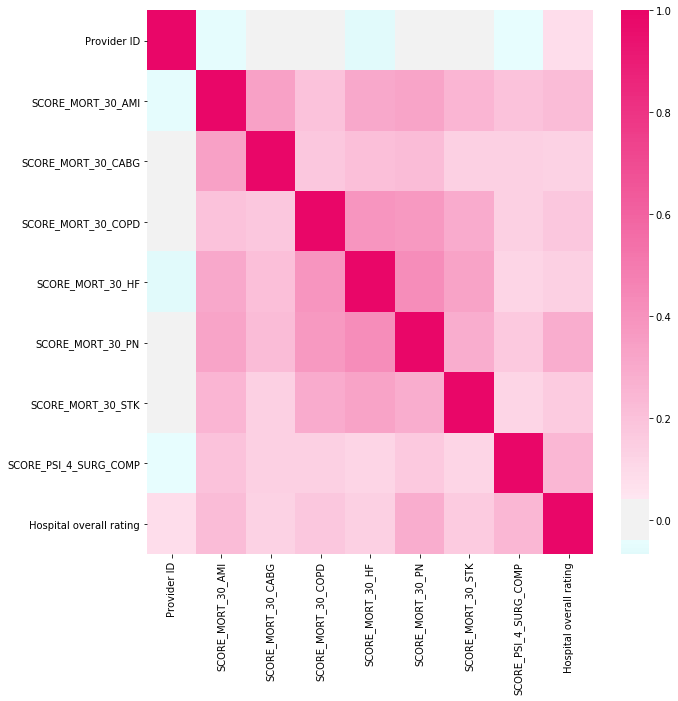

In [187]:
# plot feature correlation
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=mortality_rating.corr(), center=0.0, cmap=mycmap)

In [188]:
mortality_rating.groupby('Hospital overall rating').mean()

,Provider ID,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_PSI_4_SURG_COMP
Hospital overall rating,,,,,,,,
1.0,242599.042735,-0.435905,-0.226292,-0.411429,0.089234,-0.502824,-0.553853,-0.600795
2.0,248170.095599,-0.229385,-0.118187,-0.195366,-0.073771,-0.335232,-0.085187,-0.239670
3.0,256518.501403,0.017126,-0.015122,0.010087,0.006310,-0.021131,0.020895,0.017711
4.0,285460.955941,0.252268,0.132604,0.212348,0.293892,0.431603,0.210795,0.289648
5.0,277031.836364,0.808731,0.394333,0.590592,0.744273,0.881808,0.395191,0.443548


In [189]:
experience_rating = pd.merge(experience_score, rating.iloc[:,[0,12]], on='Provider ID')
experience_rating.head()

,Provider ID,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE,Hospital overall rating
0,10001,-0.852808,-0.52362,0.041183,-1.200044,-0.606470,-0.415284,0.027641,0.164906,0.084199,0.968685,0.450093,3.0
1,10005,-1.111758,-0.12919,0.859715,-0.290073,0.166743,0.284548,0.308698,-0.183372,0.391558,0.577306,0.221296,3.0
2,10006,-1.111758,-0.12919,0.859715,-0.517566,-0.219863,-0.182007,-1.096586,-0.531651,-1.145235,0.577306,-0.922687,2.0
3,10007,0.441942,-0.12919,1.678246,0.392406,0.553350,0.751103,-0.253416,0.164906,-0.530518,1.751442,-0.465094,3.0
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


##### Important Measures:
1. MORT_30_AMI
2. MORT_30_PN
3. PSI_4_SURG_COMP

##### Direction  - Positive

### Experience

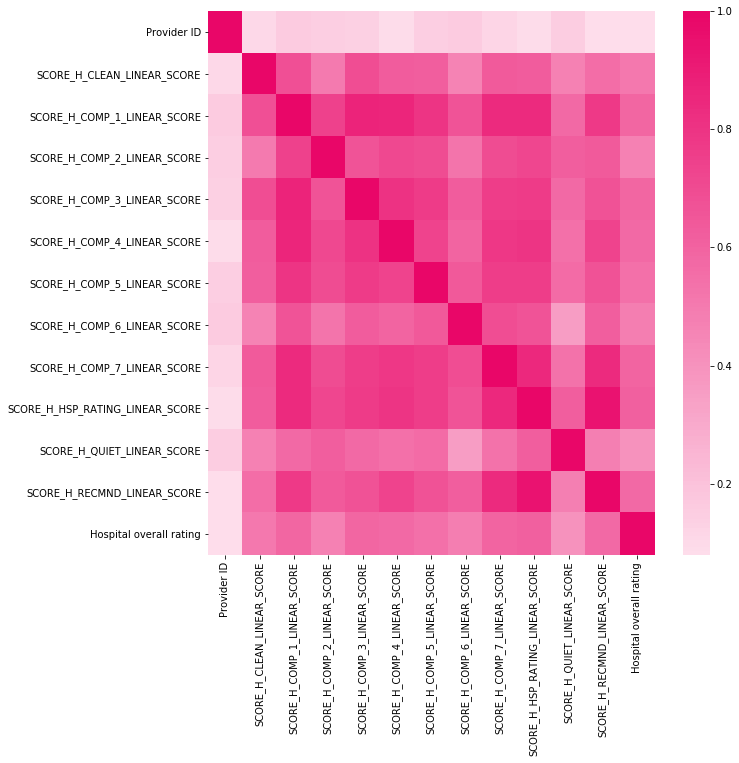

In [190]:
# plot feature correlation
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=experience_rating.corr(), center=0.0, cmap=mycmap)

In [191]:
experience_rating.groupby('Hospital overall rating').mean()

,Provider ID,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE
Hospital overall rating,,,,,,,,,,,,
1.0,242599.042735,-1.278387,-1.573145,-1.165261,-1.636167,-1.480537,-1.305796,-1.316372,-1.370548,-1.530102,-1.092009,-1.310345
2.0,248170.095599,-0.721714,-0.788011,-0.715319,-0.817791,-0.752051,-0.745153,-0.648754,-0.780888,-0.782648,-0.574886,-0.727357
3.0,256518.501403,-0.127900,-0.098648,-0.079544,-0.113917,-0.081871,-0.152417,-0.072884,-0.125069,-0.103340,-0.076125,-0.101587
4.0,285460.955941,0.335850,0.449165,0.322484,0.362359,0.421329,0.376035,0.430666,0.488777,0.497442,0.241311,0.531806
5.0,277031.836364,0.919456,1.130089,0.810903,1.045665,1.035721,1.012202,0.875968,1.244889,1.380227,0.963299,1.371576


In [192]:
readmission_rating = pd.merge(readmission_score, rating.iloc[:,[0,12]], on='Provider ID')
readmission_rating.head()

,Provider ID,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK,Hospital overall rating
0,10001,0.408730,-0.615156,-0.866907,0.370423,-0.884170,0.215408,-1.105482,-0.124569,3.0
1,10005,0.199974,NaN,1.574551,0.036453,-1.968440,0.820649,0.495640,-0.777118,3.0
2,10006,0.826243,-0.703937,0.156930,0.904776,-0.703459,0.215408,-0.548570,0.527980,2.0
3,10007,NaN,NaN,0.078174,0.570805,NaN,-1.237171,-0.130886,-0.124569,3.0
4,10008,NaN,NaN,0.629471,-0.765075,NaN,-0.147737,0.774096,NaN,3.0


##### Important Measures:
1. H_CLEAN_LINEAR_SCORE
2. H_COMP_1_LINEAR_SCORE
3. H_COMP_3_LINEAR_SCORE
4. H_COMP_4_LINEAR_SCORE
5. H_COMP_5_LINEAR_SCORE
6. H_COMP_7_LINEAR_SCORE
7. H_HSP_RATING_LINEAR_SCORE
8. H_RECMND_LINEAR_SCORE

##### Direction - Positive

### Readmission

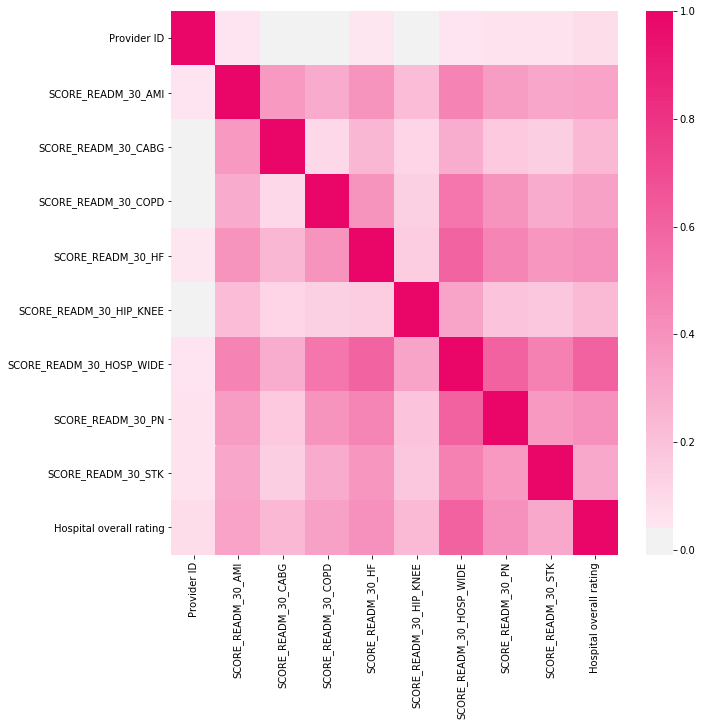

In [193]:
# plot feature correlation
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=readmission_rating.corr(), center=0.0, cmap=mycmap)

In [194]:
readmission_rating.groupby('Hospital overall rating').mean()

,Provider ID,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK
Hospital overall rating,,,,,,,,,
1.0,242599.042735,-0.588123,-0.579452,-1.011061,-1.135574,-0.308570,-1.755011,-1.235912,-0.946362
2.0,248170.095599,-0.415246,-0.214255,-0.400337,-0.493571,-0.286076,-0.784207,-0.623684,-0.327838
3.0,256518.501403,0.045414,-0.037046,0.010759,-0.029579,-0.062898,-0.017387,-0.018382,0.019525
4.0,285460.955941,0.364088,0.312897,0.384640,0.466254,0.204711,0.661034,0.419719,0.324234
5.0,277031.836364,1.010913,0.454546,0.975750,1.275947,0.897698,1.673687,0.872627,0.662818


In [195]:
safety_rating = pd.merge(safety_score, rating.iloc[:,[0,12]], on='Provider ID')
safety_rating.head()

,Provider ID,SCORE_HAI_1_SIR,SCORE_HAI_2_SIR,SCORE_HAI_3_SIR,SCORE_HAI_4_SIR,SCORE_HAI_5_SIR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY,Hospital overall rating
0,10001,-2.351722,-2.088233,-1.135102,1.018262,0.646982,0.056649,-1.355218,1.210947,3.0
1,10005,-1.023215,0.050036,0.723109,NaN,-0.456981,0.798544,0.074474,0.230454,3.0
2,10006,0.389548,-0.357358,0.818273,NaN,-0.311843,0.588793,-1.355218,-0.115603,2.0
3,10007,NaN,1.054208,NaN,NaN,NaN,1.585107,NaN,0.576510,3.0
4,10008,NaN,NaN,NaN,NaN,NaN,0.448960,NaN,-0.057927,3.0


##### Important Measures:
1. READM_30_AMI
2. READM_30_COPD
3. READM_30_HF
4. READM_30_HOSP_WIDE
5. READM_30_PN

##### Direction - Positive

### Safety

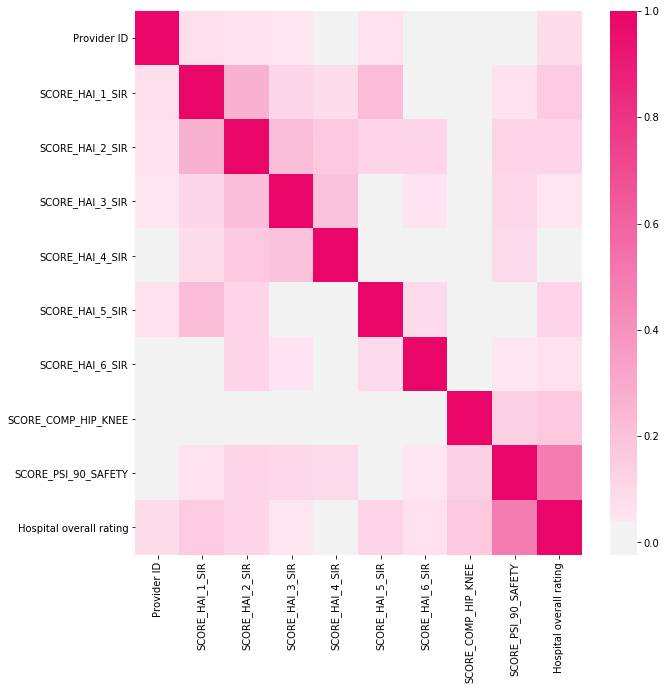

In [196]:
# plot feature correlation
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=safety_rating.corr(), center=0.0, cmap=mycmap)

In [197]:
safety_rating.groupby('Hospital overall rating').mean()

,Provider ID,SCORE_HAI_1_SIR,SCORE_HAI_2_SIR,SCORE_HAI_3_SIR,SCORE_HAI_4_SIR,SCORE_HAI_5_SIR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY
Hospital overall rating,,,,,,,,,
1.0,242599.042735,-0.445351,-0.526080,-0.172525,-0.395435,-0.340704,-0.025697,-0.203773,-1.880087
2.0,248170.095599,-0.173871,-0.113840,-0.045871,0.036243,-0.070889,-0.107295,-0.150994,-0.530674
3.0,256518.501403,0.043881,0.040675,0.011899,0.043438,0.002350,-0.072182,-0.081042,0.065256
4.0,285460.955941,0.180598,0.081488,0.061358,-0.048783,0.152096,-0.036181,0.149336,0.471400
5.0,277031.836364,0.232426,0.119598,-0.028525,0.166484,0.280411,0.521596,0.850024,0.942491


In [198]:
timeliness_rating = pd.merge(timeliness_score, rating.iloc[:,[0,12]], on='Provider ID')
timeliness_rating.head()

,Provider ID,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5,Hospital overall rating
0,10001,0.089260,0.508357,-1.265782,-2.413901,-2.587377,NaN,NaN,3.0
1,10005,0.341548,0.462833,0.615838,-0.048974,-0.379811,NaN,-0.714534,3.0
2,10006,0.593835,0.356610,0.234751,1.009019,-0.266602,NaN,NaN,2.0
3,10007,0.574429,0.508357,0.568202,-0.733558,-2.077939,NaN,0.248015,3.0
4,10008,0.952860,0.690454,1.068380,-0.048974,0.242836,NaN,NaN,3.0


##### Important Measures:
1. PSI_90_SAFETY
2. HAI_1_SIR

##### Direction - Positive

### Timeliness

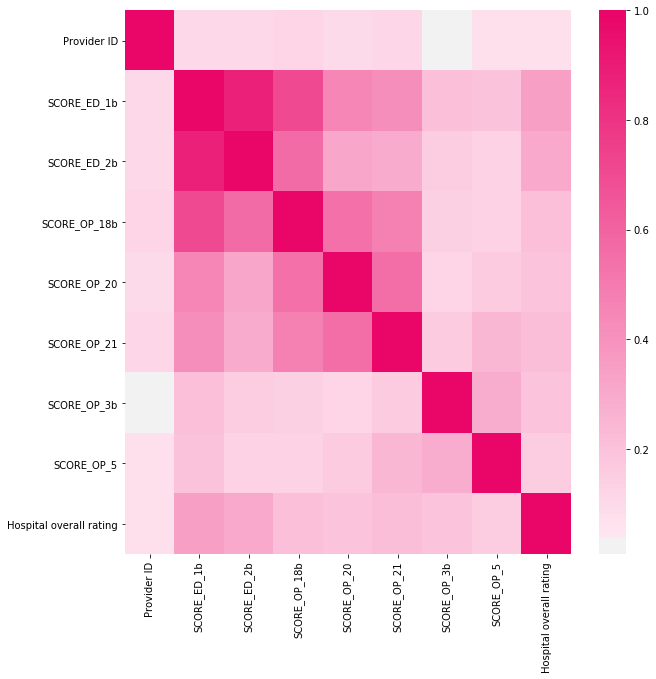

In [199]:
# plot feature correlation
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=timeliness_rating.corr(), center=0.0, cmap=mycmap)

In [200]:
timeliness_rating.groupby('Hospital overall rating').mean()

,Provider ID,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5
Hospital overall rating,,,,,,,,
1.0,242599.042735,-1.403319,-1.295953,-0.982099,-1.010688,-0.763243,-0.403162,-0.841590
2.0,248170.095599,-0.525862,-0.523189,-0.446946,-0.273379,-0.295135,-0.137138,-0.083595
3.0,256518.501403,0.020085,0.013048,-0.050641,-0.011880,-0.009130,0.075691,-0.008602
4.0,285460.955941,0.161610,0.105358,-0.020376,0.092610,0.186544,0.223792,0.185036
5.0,277031.836364,0.302010,0.171343,-0.052071,0.117570,0.291481,0.542403,0.325019


In [201]:
effectiveness_rating = pd.merge(effectiveness_score, rating.iloc[:,[0,12]], on='Provider ID')
effectiveness_rating.head()

,Provider ID,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6,Hospital overall rating
0,10001,NaN,0.363857,-0.233117,-1.201473,NaN,NaN,0.071075,NaN,0.538880,-1.228236,-0.024906,0.446005,-0.570074,0.333841,0.381176,-0.277730,-0.253670,0.416331,3.0
1,10005,NaN,0.530272,-0.099026,-0.108314,0.783472,0.692171,0.500302,0.545870,0.324044,NaN,0.193305,-0.915528,0.618334,0.178342,-0.450362,0.819555,0.635329,NaN,3.0
2,10006,NaN,0.613480,0.169157,0.438265,NaN,-0.101641,0.328611,NaN,0.538880,NaN,0.193305,0.198454,-0.295826,0.411590,-1.281900,-0.887332,-0.075870,0.416331,2.0
3,10007,NaN,0.530272,-2.110397,0.438265,NaN,-2.627406,-3.448585,-1.232556,NaN,NaN,0.411517,-3.019716,NaN,0.333841,0.381176,NaN,NaN,NaN,3.0
4,10008,NaN,0.197442,-2.780853,0.438265,NaN,0.836500,0.714915,NaN,NaN,NaN,NaN,NaN,NaN,0.489340,NaN,NaN,NaN,NaN,3.0


##### Important Measures:
1. ED_1b
2. ED_2b

##### Direction - Positive

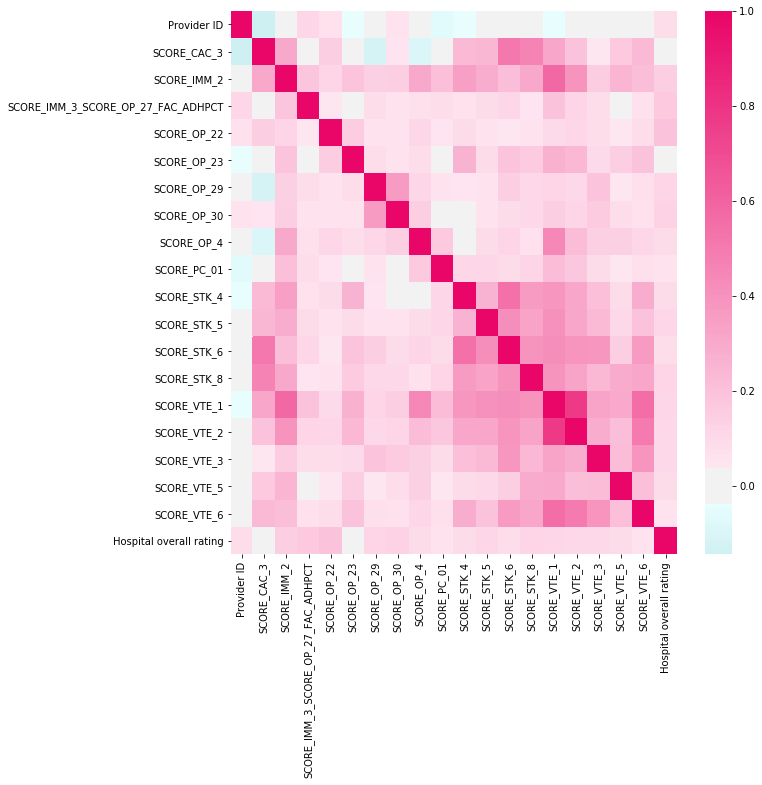

In [202]:
# plot feature correlation
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=effectiveness_rating.corr(), center=0.0, cmap=mycmap)

In [203]:
effectiveness_rating.groupby('Hospital overall rating').mean()

,Provider ID,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6
Hospital overall rating,,,,,,,,,,,,,,,,,,,
1.0,242599.042735,0.093565,-0.237086,-0.286048,-0.668713,-0.018326,-0.283822,-0.287481,-0.108591,0.073770,-0.034699,-0.333759,-0.045869,-0.251123,-0.021015,-0.110095,-0.274949,-0.212958,-0.117559
2.0,248170.095599,-0.014552,0.054636,-0.219521,-0.240871,-0.022838,-0.150141,-0.149262,-0.083795,-0.080140,-0.102253,-0.074913,-0.057805,-0.120716,0.034207,-0.025675,-0.095476,-0.090140,0.005928
3.0,256518.501403,0.215840,0.115521,-0.003132,-0.028491,0.035300,0.005299,-0.016212,0.024706,0.014012,0.004801,0.059220,0.002339,0.039808,0.056110,-0.018714,-0.018603,0.010213,-0.005673
4.0,285460.955941,-0.092921,0.270066,0.222955,0.171065,0.046209,0.137447,0.170127,0.150477,0.117249,0.195780,0.095156,0.160288,0.186885,0.236444,0.192132,0.137730,0.100533,0.068418
5.0,277031.836364,0.398105,0.309394,0.239860,0.392716,-0.063199,0.278612,0.224726,0.202041,0.117470,0.106721,0.186693,0.277414,0.090153,0.362113,0.278833,0.233481,0.259214,0.254199


In [204]:
use_rating = pd.merge(use_score, rating.iloc[:,[0,12]], on='Provider ID')
use_rating.head()

,Provider ID,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8,Hospital overall rating
0,10001,0.250773,0.388702,-1.200254,0.207542,0.299702,3.0
1,10005,-0.423501,-1.203826,-0.305241,-0.649118,-0.378434,3.0
2,10006,-0.276919,-0.244884,2.330076,-0.970365,-0.782429,2.0
3,10007,-1.498429,-0.501744,NaN,NaN,NaN,3.0
4,10008,0.524391,NaN,NaN,1.171284,NaN,3.0


### Use of Medical Imaging

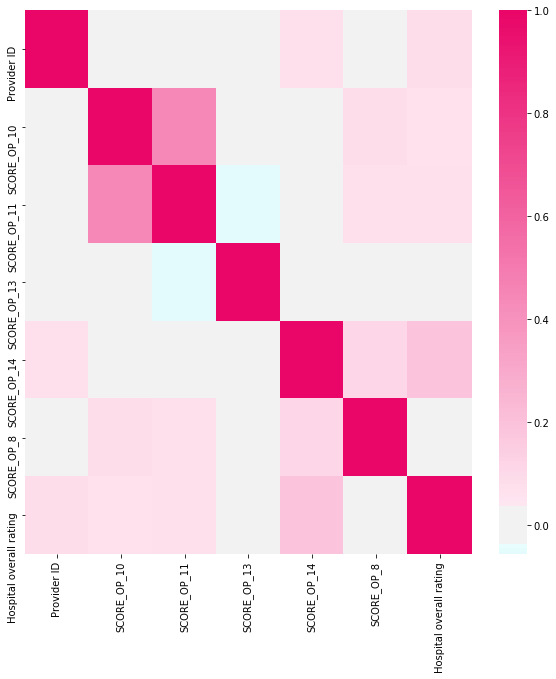

In [205]:
# plot feature correlation
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=use_rating.corr(), center=0.0, cmap=mycmap)

In [206]:
use_rating.groupby('Hospital overall rating').mean()

,Provider ID,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8
Hospital overall rating,,,,,,
1.0,242599.042735,0.074961,0.132157,0.031852,-0.685596,0.130071
2.0,248170.095599,-0.081840,-0.067962,-0.036805,-0.277876,0.031227
3.0,256518.501403,0.005369,0.006308,0.008939,-0.042686,0.009015
4.0,285460.955941,0.146064,0.163613,-0.032854,0.048770,0.043743
5.0,277031.836364,0.124011,0.235810,-0.135279,0.316571,0.096995


In [207]:
master_df.head()

,Provider ID,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_PSI_4_SURG_COMP,SCORE_HAI_1_SIR,SCORE_HAI_2_SIR,SCORE_HAI_3_SIR,SCORE_HAI_4_SIR,SCORE_HAI_5_SIR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5
0,10001,-0.852808,-0.52362,0.041183,-1.200044,-0.606470,-0.415284,0.027641,0.164906,0.084199,0.968685,0.450093,0.408730,-0.615156,-0.866907,0.370423,-0.884170,0.215408,-1.105482,-0.124569,1.249515,-0.996059,-1.094132,-0.165556,0.427705,-0.282062,-1.712029,-2.351722,-2.088233,-1.135102,1.018262,0.646982,0.056649,-1.355218,1.210947,0.250773,0.388702,-1.200254,0.207542,0.299702,NaN,0.363857,-0.233117,-1.201473,NaN,NaN,0.071075,NaN,0.538880,-1.228236,-0.024906,0.446005,-0.570074,0.333841,0.381176,-0.277730,-0.253670,0.416331,0.089260,0.508357,-1.265782,-2.413901,-2.587377,NaN,NaN
1,10005,-1.111758,-0.12919,0.859715,-0.290073,0.166743,0.284548,0.308698,-0.183372,0.391558,0.577306,0.221296,0.199974,NaN,1.574551,0.036453,-1.968440,0.820649,0.495640,-0.777118,-1.546065,NaN,0.434008,-2.286446,-2.103663,-0.342167,-2.298415,-1.023215,0.050036,0.723109,NaN,-0.456981,0.798544,0.074474,0.230454,-0.423501,-1.203826,-0.305241,-0.649118,-0.378434,NaN,0.530272,-0.099026,-0.108314,0.783472,0.692171,0.500302,0.545870,0.324044,NaN,0.193305,-0.915528,0.618334,0.178342,-0.450362,0.819555,0.635329,NaN,0.341548,0.462833,0.615838,-0.048974,-0.379811,NaN,-0.714534
2,10006,-1.111758,-0.12919,0.859715,-0.517566,-0.219863,-0.182007,-1.096586,-0.531651,-1.145235,0.577306,-0.922687,0.826243,-0.703937,0.156930,0.904776,-0.703459,0.215408,-0.548570,0.527980,-2.105181,-0.881358,0.883461,-2.354862,-0.861860,-1.784684,-3.333810,0.389548,-0.357358,0.818273,NaN,-0.311843,0.588793,-1.355218,-0.115603,-0.276919,-0.244884,2.330076,-0.970365,-0.782429,NaN,0.613480,0.169157,0.438265,NaN,-0.101641,0.328611,NaN,0.538880,NaN,0.193305,0.198454,-0.295826,0.411590,-1.281900,-0.887332,-0.075870,0.416331,0.593835,0.356610,0.234751,1.009019,-0.266602,NaN,NaN
3,10007,0.441942,-0.12919,1.678246,0.392406,0.553350,0.751103,-0.253416,0.164906,-0.530518,1.751442,-0.465094,NaN,NaN,0.078174,0.570805,NaN,-1.237171,-0.130886,-0.124569,NaN,NaN,-1.094132,-1.533872,-1.148430,-1.003320,NaN,NaN,1.054208,NaN,NaN,NaN,1.585107,NaN,0.576510,-1.498429,-0.501744,NaN,NaN,NaN,NaN,0.530272,-2.110397,0.438265,NaN,-2.627406,-3.448585,-1.232556,NaN,NaN,0.411517,-3.019716,NaN,0.333841,0.381176,NaN,NaN,NaN,0.574429,0.508357,0.568202,-0.733558,-2.077939,NaN,0.248015
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629471,-0.765075,NaN,-0.147737,0.774096,NaN,NaN,NaN,-0.105335,-0.370803,0.332182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.448960,NaN,-0.057927,0.524391,NaN,NaN,1.171284,NaN,NaN,0.197442,-2.780853,0.438265,NaN,0.836500,0.714915,NaN,NaN,NaN,NaN,NaN,NaN,0.489340,NaN,NaN,NaN,NaN,0.952860,0.690454,1.068380,-0.048974,0.242836,NaN,NaN


##### Important Measures:
1. OP_14
2. OP_10
3. OP_11

##### Direction - Positive

## Handling missing data

In [208]:
final_df = pd.merge(master_df, rating.iloc[:,[0,12]], on='Provider ID')
final_df.head()

,Provider ID,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE,SCORE_READM_30_AMI,SCORE_READM_30_CABG,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HIP_KNEE,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK,SCORE_MORT_30_AMI,SCORE_MORT_30_CABG,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_PSI_4_SURG_COMP,SCORE_HAI_1_SIR,SCORE_HAI_2_SIR,SCORE_HAI_3_SIR,SCORE_HAI_4_SIR,SCORE_HAI_5_SIR,SCORE_HAI_6_SIR,SCORE_COMP_HIP_KNEE,SCORE_PSI_90_SAFETY,SCORE_OP_10,SCORE_OP_11,SCORE_OP_13,SCORE_OP_14,SCORE_OP_8,SCORE_CAC_3,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_23,SCORE_OP_29,SCORE_OP_30,SCORE_OP_4,SCORE_PC_01,SCORE_STK_4,SCORE_STK_5,SCORE_STK_6,SCORE_STK_8,SCORE_VTE_1,SCORE_VTE_2,SCORE_VTE_3,SCORE_VTE_5,SCORE_VTE_6,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,SCORE_OP_3b,SCORE_OP_5,Hospital overall rating
0,10001,-0.852808,-0.52362,0.041183,-1.200044,-0.606470,-0.415284,0.027641,0.164906,0.084199,0.968685,0.450093,0.408730,-0.615156,-0.866907,0.370423,-0.884170,0.215408,-1.105482,-0.124569,1.249515,-0.996059,-1.094132,-0.165556,0.427705,-0.282062,-1.712029,-2.351722,-2.088233,-1.135102,1.018262,0.646982,0.056649,-1.355218,1.210947,0.250773,0.388702,-1.200254,0.207542,0.299702,NaN,0.363857,-0.233117,-1.201473,NaN,NaN,0.071075,NaN,0.538880,-1.228236,-0.024906,0.446005,-0.570074,0.333841,0.381176,-0.277730,-0.253670,0.416331,0.089260,0.508357,-1.265782,-2.413901,-2.587377,NaN,NaN,3.0
1,10005,-1.111758,-0.12919,0.859715,-0.290073,0.166743,0.284548,0.308698,-0.183372,0.391558,0.577306,0.221296,0.199974,NaN,1.574551,0.036453,-1.968440,0.820649,0.495640,-0.777118,-1.546065,NaN,0.434008,-2.286446,-2.103663,-0.342167,-2.298415,-1.023215,0.050036,0.723109,NaN,-0.456981,0.798544,0.074474,0.230454,-0.423501,-1.203826,-0.305241,-0.649118,-0.378434,NaN,0.530272,-0.099026,-0.108314,0.783472,0.692171,0.500302,0.545870,0.324044,NaN,0.193305,-0.915528,0.618334,0.178342,-0.450362,0.819555,0.635329,NaN,0.341548,0.462833,0.615838,-0.048974,-0.379811,NaN,-0.714534,3.0
2,10006,-1.111758,-0.12919,0.859715,-0.517566,-0.219863,-0.182007,-1.096586,-0.531651,-1.145235,0.577306,-0.922687,0.826243,-0.703937,0.156930,0.904776,-0.703459,0.215408,-0.548570,0.527980,-2.105181,-0.881358,0.883461,-2.354862,-0.861860,-1.784684,-3.333810,0.389548,-0.357358,0.818273,NaN,-0.311843,0.588793,-1.355218,-0.115603,-0.276919,-0.244884,2.330076,-0.970365,-0.782429,NaN,0.613480,0.169157,0.438265,NaN,-0.101641,0.328611,NaN,0.538880,NaN,0.193305,0.198454,-0.295826,0.411590,-1.281900,-0.887332,-0.075870,0.416331,0.593835,0.356610,0.234751,1.009019,-0.266602,NaN,NaN,2.0
3,10007,0.441942,-0.12919,1.678246,0.392406,0.553350,0.751103,-0.253416,0.164906,-0.530518,1.751442,-0.465094,NaN,NaN,0.078174,0.570805,NaN,-1.237171,-0.130886,-0.124569,NaN,NaN,-1.094132,-1.533872,-1.148430,-1.003320,NaN,NaN,1.054208,NaN,NaN,NaN,1.585107,NaN,0.576510,-1.498429,-0.501744,NaN,NaN,NaN,NaN,0.530272,-2.110397,0.438265,NaN,-2.627406,-3.448585,-1.232556,NaN,NaN,0.411517,-3.019716,NaN,0.333841,0.381176,NaN,NaN,NaN,0.574429,0.508357,0.568202,-0.733558,-2.077939,NaN,0.248015,3.0
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629471,-0.765075,NaN,-0.147737,0.774096,NaN,NaN,NaN,-0.105335,-0.370803,0.332182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.448960,NaN,-0.057927,0.524391,NaN,NaN,1.171284,NaN,NaN,0.197442,-2.780853,0.438265,NaN,0.836500,0.714915,NaN,NaN,NaN,NaN,NaN,NaN,0.489340,NaN,NaN,NaN,NaN,0.952860,0.690454,1.068380,-0.048974,0.242836,NaN,NaN,3.0


In [209]:
final_df = final_df[final_df['Hospital overall rating'].notna()]

In [210]:
# % of null values in each column
final_df.isnull().sum()*100/final_df.shape[0]

Provider ID                            0.000000
SCORE_H_CLEAN_LINEAR_SCORE             3.234237
SCORE_H_COMP_1_LINEAR_SCORE            3.234237
SCORE_H_COMP_2_LINEAR_SCORE            3.234237
SCORE_H_COMP_3_LINEAR_SCORE            3.234237
SCORE_H_COMP_4_LINEAR_SCORE            3.234237
SCORE_H_COMP_5_LINEAR_SCORE            3.234237
SCORE_H_COMP_6_LINEAR_SCORE            3.234237
SCORE_H_COMP_7_LINEAR_SCORE            3.234237
SCORE_H_HSP_RATING_LINEAR_SCORE        3.234237
SCORE_H_QUIET_LINEAR_SCORE             3.234237
SCORE_H_RECMND_LINEAR_SCORE            3.234237
SCORE_READM_30_AMI                    30.349559
SCORE_READM_30_CABG                   66.514211
SCORE_READM_30_COPD                    5.717086
SCORE_READM_30_HF                      5.423064
SCORE_READM_30_HIP_KNEE               20.744855
SCORE_READM_30_HOSP_WIDE               0.098007
SCORE_READM_30_PN                      4.083633
SCORE_READM_30_STK                    19.666776
SCORE_MORT_30_AMI                     24

In [211]:
# drop columns with greater than 20% values as null
final_df = final_df.drop(['SCORE_OP_5','SCORE_OP_3b','SCORE_VTE_6','SCORE_VTE_5','SCORE_VTE_3','SCORE_STK_8',
                         'SCORE_STK_5','SCORE_STK_4','SCORE_PC_01','SCORE_OP_4','SCORE_OP_23','SCORE_CAC_3',
                         'SCORE_OP_8','SCORE_OP_14','SCORE_OP_13','SCORE_COMP_HIP_KNEE','SCORE_HAI_5_SIR',
                         'SCORE_HAI_4_SIR','SCORE_HAI_3_SIR','SCORE_HAI_1_SIR','SCORE_PSI_4_SURG_COMP',
                         'SCORE_MORT_30_CABG','SCORE_MORT_30_AMI','SCORE_READM_30_HIP_KNEE','SCORE_READM_30_CABG',
                         'SCORE_READM_30_AMI'], axis = 1)

In [212]:
# % of null values in each column
final_df.isnull().sum()*100/final_df.shape[0]

Provider ID                            0.000000
SCORE_H_CLEAN_LINEAR_SCORE             3.234237
SCORE_H_COMP_1_LINEAR_SCORE            3.234237
SCORE_H_COMP_2_LINEAR_SCORE            3.234237
SCORE_H_COMP_3_LINEAR_SCORE            3.234237
SCORE_H_COMP_4_LINEAR_SCORE            3.234237
SCORE_H_COMP_5_LINEAR_SCORE            3.234237
SCORE_H_COMP_6_LINEAR_SCORE            3.234237
SCORE_H_COMP_7_LINEAR_SCORE            3.234237
SCORE_H_HSP_RATING_LINEAR_SCORE        3.234237
SCORE_H_QUIET_LINEAR_SCORE             3.234237
SCORE_H_RECMND_LINEAR_SCORE            3.234237
SCORE_READM_30_COPD                    5.717086
SCORE_READM_30_HF                      5.423064
SCORE_READM_30_HOSP_WIDE               0.098007
SCORE_READM_30_PN                      4.083633
SCORE_READM_30_STK                    19.666776
SCORE_MORT_30_COPD                     6.337798
SCORE_MORT_30_HF                       5.553741
SCORE_MORT_30_PN                       4.214309
SCORE_MORT_30_STK                     18

In [213]:
# replace nan's with column median values
for col in final_df.columns:
    array = final_df[final_df[col]!=np.nan][col]
    final_df[col] = final_df[col].replace(np.nan,array.median())

In [214]:
# % of null values in each column
final_df.isnull().sum()*100/final_df.shape[0]

Provider ID                           0.0
SCORE_H_CLEAN_LINEAR_SCORE            0.0
SCORE_H_COMP_1_LINEAR_SCORE           0.0
SCORE_H_COMP_2_LINEAR_SCORE           0.0
SCORE_H_COMP_3_LINEAR_SCORE           0.0
SCORE_H_COMP_4_LINEAR_SCORE           0.0
SCORE_H_COMP_5_LINEAR_SCORE           0.0
SCORE_H_COMP_6_LINEAR_SCORE           0.0
SCORE_H_COMP_7_LINEAR_SCORE           0.0
SCORE_H_HSP_RATING_LINEAR_SCORE       0.0
SCORE_H_QUIET_LINEAR_SCORE            0.0
SCORE_H_RECMND_LINEAR_SCORE           0.0
SCORE_READM_30_COPD                   0.0
SCORE_READM_30_HF                     0.0
SCORE_READM_30_HOSP_WIDE              0.0
SCORE_READM_30_PN                     0.0
SCORE_READM_30_STK                    0.0
SCORE_MORT_30_COPD                    0.0
SCORE_MORT_30_HF                      0.0
SCORE_MORT_30_PN                      0.0
SCORE_MORT_30_STK                     0.0
SCORE_HAI_2_SIR                       0.0
SCORE_HAI_6_SIR                       0.0
SCORE_PSI_90_SAFETY               

In [215]:
final_df.to_csv('MasterData.csv',index=False)

In [216]:
rating = pd.read_csv('MasterData.csv')
rating.head()

,Provider ID,SCORE_H_CLEAN_LINEAR_SCORE,SCORE_H_COMP_1_LINEAR_SCORE,SCORE_H_COMP_2_LINEAR_SCORE,SCORE_H_COMP_3_LINEAR_SCORE,SCORE_H_COMP_4_LINEAR_SCORE,SCORE_H_COMP_5_LINEAR_SCORE,SCORE_H_COMP_6_LINEAR_SCORE,SCORE_H_COMP_7_LINEAR_SCORE,SCORE_H_HSP_RATING_LINEAR_SCORE,SCORE_H_QUIET_LINEAR_SCORE,SCORE_H_RECMND_LINEAR_SCORE,SCORE_READM_30_COPD,SCORE_READM_30_HF,SCORE_READM_30_HOSP_WIDE,SCORE_READM_30_PN,SCORE_READM_30_STK,SCORE_MORT_30_COPD,SCORE_MORT_30_HF,SCORE_MORT_30_PN,SCORE_MORT_30_STK,SCORE_HAI_2_SIR,SCORE_HAI_6_SIR,SCORE_PSI_90_SAFETY,SCORE_OP_10,SCORE_OP_11,SCORE_IMM_2,SCORE_IMM_3_SCORE_OP_27_FAC_ADHPCT,SCORE_OP_22,SCORE_OP_29,SCORE_OP_30,SCORE_STK_6,SCORE_VTE_1,SCORE_VTE_2,SCORE_ED_1b,SCORE_ED_2b,SCORE_OP_18b,SCORE_OP_20,SCORE_OP_21,Hospital overall rating
0,10001,-0.852808,-0.52362,0.041183,-1.200044,-0.606470,-0.415284,0.027641,0.164906,0.084199,0.968685,0.450093,-0.866907,0.370423,0.215408,-1.105482,-0.124569,-1.094132,-0.165556,0.427705,-0.282062,-2.088233,0.056649,1.210947,0.250773,0.388702,0.363857,-0.233117,-1.201473,0.367430,0.071075,0.446005,0.333841,0.381176,0.089260,0.508357,-1.265782,-2.413901,-2.587377,3.0
1,10005,-1.111758,-0.12919,0.859715,-0.290073,0.166743,0.284548,0.308698,-0.183372,0.391558,0.577306,0.221296,1.574551,0.036453,0.820649,0.495640,-0.777118,0.434008,-2.286446,-2.103663,-0.342167,0.050036,0.798544,0.230454,-0.423501,-1.203826,0.530272,-0.099026,-0.108314,0.692171,0.500302,-0.915528,0.178342,-0.450362,0.341548,0.462833,0.615838,-0.048974,-0.379811,3.0
2,10006,-1.111758,-0.12919,0.859715,-0.517566,-0.219863,-0.182007,-1.096586,-0.531651,-1.145235,0.577306,-0.922687,0.156930,0.904776,0.215408,-0.548570,0.527980,0.883461,-2.354862,-0.861860,-1.784684,-0.357358,0.588793,-0.115603,-0.276919,-0.244884,0.613480,0.169157,0.438265,-0.101641,0.328611,0.198454,0.411590,-1.281900,0.593835,0.356610,0.234751,1.009019,-0.266602,2.0
3,10007,0.441942,-0.12919,1.678246,0.392406,0.553350,0.751103,-0.253416,0.164906,-0.530518,1.751442,-0.465094,0.078174,0.570805,-1.237171,-0.130886,-0.124569,-1.094132,-1.533872,-1.148430,-1.003320,1.054208,1.585107,0.576510,-1.498429,-0.501744,0.530272,-2.110397,0.438265,-2.627406,-3.448585,-3.019716,0.333841,0.381176,0.574429,0.508357,0.568202,-0.733558,-2.077939,3.0
4,10008,-0.075958,-0.12919,0.041183,-0.062580,-0.219863,-0.182007,0.027641,-0.183372,0.084199,-0.009762,-0.007500,0.629471,-0.765075,-0.147737,0.774096,0.061873,-0.105335,-0.370803,0.332182,0.078568,0.113898,0.448960,-0.057927,0.524391,0.405826,0.197442,-2.780853,0.438265,0.836500,0.714915,0.322230,0.489340,0.381176,0.952860,0.690454,1.068380,-0.048974,0.242836,3.0


## Random Forest

In [217]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from math import sqrt

Using TensorFlow backend.


In [218]:
# divide data into train and test
X = rating.drop(['Provider ID','Hospital overall rating'], axis = 1)
y = rating['Hospital overall rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [219]:
# fit random forest model
rf_exp = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf_exp.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [220]:
# predict on test data
y_pred = rf_exp.predict(X_test)

In [221]:
# evaluate model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 10  24   1   0   0]
 [  3 142  52   1   0]
 [  0  40 366  22   0]
 [  0   1  81 138   5]
 [  0   0   1  14  18]]
              precision    recall  f1-score   support

         1.0       0.77      0.29      0.42        35
         2.0       0.69      0.72      0.70       198
         3.0       0.73      0.86      0.79       428
         4.0       0.79      0.61      0.69       225
         5.0       0.78      0.55      0.64        33

    accuracy                           0.73       919
   macro avg       0.75      0.60      0.65       919
weighted avg       0.74      0.73      0.73       919

0.7334058759521219


In [222]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=1500, max_features=max_features, oob_score=True, random_state=42, verbose=1)

6


In [223]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    8.3s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=True, random_state=42, verbose=1,
                       warm_start=False)

In [224]:
# OOB score
rf_model.oob_score_

0.7749766573295985

In [225]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[  9  26   0   0   0]
 [  0 132  65   1   0]
 [  0  15 393  20   0]
 [  0   0  66 156   3]
 [  0   0   1  14  18]]


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.4s finished


In [226]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  9  26   0   0   0]
 [  0 132  65   1   0]
 [  0  15 393  20   0]
 [  0   0  66 156   3]
 [  0   0   1  14  18]]
              precision    recall  f1-score   support

         1.0       1.00      0.26      0.41        35
         2.0       0.76      0.67      0.71       198
         3.0       0.75      0.92      0.82       428
         4.0       0.82      0.69      0.75       225
         5.0       0.86      0.55      0.67        33

    accuracy                           0.77       919
   macro avg       0.84      0.62      0.67       919
weighted avg       0.78      0.77      0.76       919

0.7704026115342764


## Important Features

In [227]:
# predictors
features = X_train.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,SCORE_PSI_90_SAFETY,9.677463
1,SCORE_READM_30_HOSP_WIDE,9.529411
2,SCORE_MORT_30_PN,4.900835
3,SCORE_H_HSP_RATING_LINEAR_SCORE,3.950615
4,SCORE_H_COMP_7_LINEAR_SCORE,3.774093
5,SCORE_MORT_30_HF,3.723896
6,SCORE_H_COMP_1_LINEAR_SCORE,3.377632
7,SCORE_H_RECMND_LINEAR_SCORE,3.244837
8,SCORE_H_COMP_3_LINEAR_SCORE,3.204622
9,SCORE_READM_30_PN,3.015875


##### Important Features - Random Forest
1. SCORE_PSI_90_SAFETY
2. SCORE_READM_30_HOSP_WIDE
3. SCORE_MORT_30_PN
4. SCORE_H_HSP_RATING_LINEAR_SCORE
5. SCORE_H_COMP_7_LINEAR_SCORE
5. SCORE_MORT_30_HF
6. SCORE_H_COMP_1_LINEAR_SCORE
7. SCORE_H_RECMND_LINEAR_SCORE
8. SCORE_H_COMP_3_LINEAR_SCORE
9. SCORE_READM_30_PN

## Exporting files for Factor Analysis

In [228]:
mortality_score.to_csv('Group_Data\MortalityScore.csv',index=False)
use_score.to_csv(r'Group_Data\UseScore.csv',index=False)
timeliness_score.to_csv('Group_Data\TimelinessScore.csv',index=False)
effectiveness_score.to_csv('Group_Data\EffectivenessScore.csv',index=False)
readmission_score.to_csv('Group_Data\ReadmissionScore.csv',index=False)
safety_score.to_csv('Group_Data\SafetyScore.csv',index=False)
experience_score.to_csv('Group_Data\ExperienceScore.csv',index=False)

### Refer to the R script named 'FactorAnalysis.R' for Factor Analysis and calculation of group scores

## Importing data for Clustering

In [229]:
mortality_score = pd.read_csv("Group_Score\MortalityScore.csv")
use_score = pd.read_csv(r"Group_Score\MedicalScore.csv")
timeliness_score = pd.read_csv("Group_Score\TimelinessScore.csv")
effectiveness_score = pd.read_csv("Group_Score\EffectivenessScore.csv")
readmission_score = pd.read_csv('Group_Score\ReadmissionScore.csv')
safety_score = pd.read_csv("Group_Score\SafetyScore.csv")
experience_score = pd.read_csv("Group_Score\ExperienceScore.csv")

In [230]:
# merging groups to create master data
master_score = pd.merge(mortality_score, use_score, on='Provider.ID')
master_score = pd.merge(master_score, timeliness_score, on='Provider.ID')
master_score = pd.merge(master_score, effectiveness_score, on='Provider.ID')
master_score = pd.merge(master_score, readmission_score, on='Provider.ID')
master_score = pd.merge(master_score, safety_score, on='Provider.ID')
master_score = pd.merge(master_score, experience_score, on='Provider.ID')
master_score.head()

,Provider.ID,mortality_score,medical_score,timeliness_score,effectiveness_score,readmission_score,safety_score,experience_score
0,10001,-0.023,-0.015,0.011,0.011,-0.015,-0.133,-0.022
1,10005,-0.178,0.052,0.049,0.009,0.052,-0.002,0.007
2,10006,-0.195,0.026,0.084,0.004,0.026,0.009,-0.041
3,10007,-0.120,-0.055,0.080,0.003,-0.055,0.073,0.016
4,10011,-0.028,0.044,-0.011,-0.139,0.044,0.007,-0.043


## Final hospital score calculation

In [231]:
# calculate final score based on CMS weightage
master_score['final_score'] = ((master_score['mortality_score']*0.22) + (master_score['experience_score']*0.22) +
                               (master_score['safety_score']*0.22) + (master_score['readmission_score']*0.22) +
                               (master_score['timeliness_score']*0.04) + (master_score['medical_score']*0.04) +
                               (master_score['effectiveness_score']*0.04))

In [232]:
# rename columns and add star rating
master_score.rename(columns={'Provider.ID': 'Provider ID'},inplace=True)
master_score = pd.merge(master_score,rating[['Provider ID','Hospital overall rating']],on='Provider ID')
master_score.head()

,Provider ID,mortality_score,medical_score,timeliness_score,effectiveness_score,readmission_score,safety_score,experience_score,final_score,Hospital overall rating
0,10001,-0.023,-0.015,0.011,0.011,-0.015,-0.133,-0.022,-0.04218,3.0
1,10005,-0.178,0.052,0.049,0.009,0.052,-0.002,0.007,-0.02222,3.0
2,10006,-0.195,0.026,0.084,0.004,0.026,0.009,-0.041,-0.03966,2.0
3,10007,-0.120,-0.055,0.080,0.003,-0.055,0.073,0.016,-0.01780,3.0
4,10011,-0.028,0.044,-0.011,-0.139,0.044,0.007,-0.043,-0.00864,2.0


In [233]:
# mean final scores for each rating
master_score[['Hospital overall rating','final_score']].groupby('Hospital overall rating').mean()

,final_score
Hospital overall rating,
1.0,-0.098834
2.0,-0.043702
3.0,-0.000308
4.0,0.036018
5.0,0.076308


In [234]:
# saperate data for clustering
clustering_data = pd.DataFrame(master_score['final_score'])
clustering_data.head()

,final_score
0,-0.04218
1,-0.02222
2,-0.03966
3,-0.01780
4,-0.00864


## K-Means Clustering

In [235]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [236]:
# check the Hopkins measure
hopkins(clustering_data)

0.9756730384915306

In [237]:
# silhouette score to identify the ideal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(clustering_data)
    sse_.append([k, silhouette_score(clustering_data, kmeans.labels_)])

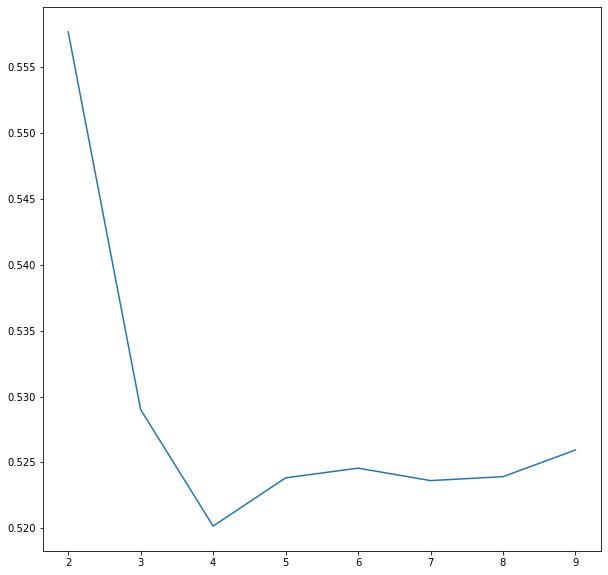

In [238]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

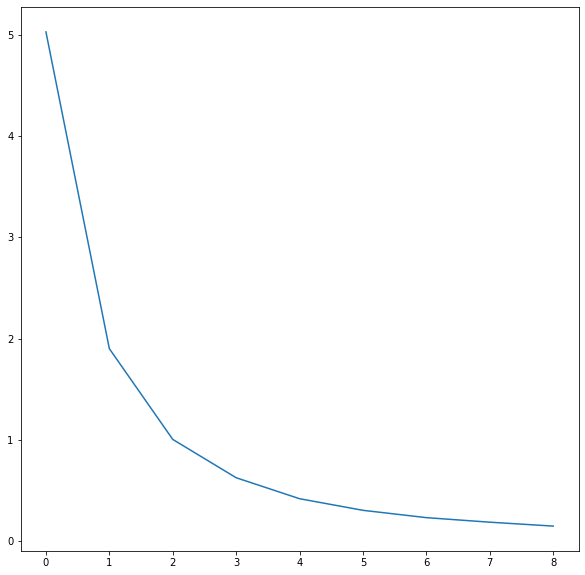

In [239]:
#  elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(clustering_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [240]:
#K-means with k=5 clusters based on business understanding
model_clus5 = KMeans(n_clusters = 5, max_iter=50, random_state=100)
model_clus5.fit(clustering_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [241]:
# cleating labels
dat4=clustering_data
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus5.labels_)], axis=1)
dat_km.head()

,final_score,0
0,-0.04218,2
1,-0.02222,1
2,-0.03966,2
3,-0.01780,1
4,-0.00864,1


In [242]:
# mean final scores for each label
dat_km.groupby(0).mean()

,final_score
0,
0,0.059127
1,-0.010118
2,-0.048116
3,0.022488
4,-0.103280


In [243]:
# mean final score for each rating
master_score[['Hospital overall rating','final_score']].groupby('Hospital overall rating').mean()

,final_score
Hospital overall rating,
1.0,-0.098834
2.0,-0.043702
3.0,-0.000308
4.0,0.036018
5.0,0.076308


In [244]:
# mapping labels with original ratings
def func(x):
    if x == 1:
        return 3
    elif x == 2:
        return 2
    elif x == 3:
        return 4
    elif x == 4:
        return 1
    else:
        return 5

dat_km['Pred_Cluster'] = dat_km[0].apply(func)

dat_km.head()

,final_score,0,Pred_Cluster
0,-0.04218,2,2
1,-0.02222,1,3
2,-0.03966,2,2
3,-0.01780,1,3
4,-0.00864,1,3


In [245]:
# accuracy of the model
dat_km['Actual_Cluster'] = master_score['Hospital overall rating']
print(accuracy_score(dat_km['Actual_Cluster'], dat_km['Pred_Cluster']))

0.5333584621183566


## Recommendations for Hospitals

In [246]:
master_score.loc[master_score['Provider ID'] == 140010]

,Provider ID,mortality_score,medical_score,timeliness_score,effectiveness_score,readmission_score,safety_score,experience_score,final_score,Hospital overall rating
728,140010,0.266,0.045,0.044,0.016,0.045,-0.034,-0.013,0.06228,3.0


In [247]:
# mean group scores for each rating
master_score.groupby('Hospital overall rating').mean()

,Provider ID,mortality_score,medical_score,timeliness_score,effectiveness_score,readmission_score,safety_score,experience_score,final_score
Hospital overall rating,,,,,,,,,
1.0,241522.631579,-0.043079,-0.156974,-0.188254,-0.001088,-0.156974,-0.056123,-0.130105,-0.098834
2.0,242825.200988,-0.022410,-0.071702,-0.073835,0.005774,-0.071702,-0.011381,-0.067740,-0.043702
3.0,259149.406835,0.002334,-0.000902,-0.003067,0.008091,-0.000902,0.008541,-0.012122,-0.000308
4.0,280149.497674,0.038307,0.062388,0.015029,0.013873,0.062388,0.015682,0.030741,0.036018
5.0,283946.431034,0.087190,0.145259,0.026707,0.015655,0.145259,0.009155,0.071138,0.076308


### Recommendations
1. Safety Score and Patient Experience scores need to be improved since they are below the mean value of Rating 4 hospitals.
2. HAI_4_SCORE and HAI_5_SCORE scores are the reason for safety score to be low.
3. H_HSP_RATING_LINEAR_SCORE_MEAN, H_RECMND_LINEAR_SCORE_MEAN, H_CLEAN_LINEAR_SCORE_MEAN are the reason for Experience score to be low. Hence these should be improved in order to achive rating 4 in the next cycle.